In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## Raw Data Initial Cleaning

In [2]:
nba = pd.read_excel("NBA_Stats_71_Years_Updated.xlsx")

In [3]:
print("Total Dataframe null counts\n\n", nba.isnull().sum())

Total Dataframe null counts

 Rank                     0
Year                     0
Season Start Year        0
Season Type              0
Player ID                0
Player                   0
Team ID                  0
Team                     0
Games Played             0
Minutes Played           0
FG Made                  0
FG Attempts              0
FG %                     0
3-Pt FG Made          6296
3-Pt FG Attempts      6296
3-Pt FG %             6296
FT Made                  0
FT Attempts              0
FT %                     0
Offensive Rebounds    4229
Defensive Rebounds    4229
Rebounds                 0
Assists                  0
Steals                4229
Blocks                4229
Turnovers             5566
Personal Fouls           0
Points Scored            0
Efficency                0
AST/TOV               5566
STL/TOV               5566
dtype: int64


In [5]:
#Creating a function incase we need to find players later
def findPlayer(s):
    return nba.loc[nba["Player"]==s]

In [6]:
#Raw Data + turning it into regular season / playoff
nba = pd.read_excel("NBA_Stats_71_Years_Updated.xlsx")

regInd = np.where(nba["Season Type"] == "Regular Season")
playInd = np.where(nba["Season Type"] == "Playoffs")

nbaRegular = nba.iloc[regInd[0],:]
nbaPlayoff = nba.iloc[playInd[0],:]

### Adding columns - and removing nan Rows - from the two dataframes

In [11]:
#Regular Season: Immediately add columns for calculation of PPS

nbaRegular["2-Pt FG Attempts"] = (nbaRegular["FG Attempts"] - nbaRegular["3-Pt FG Attempts"])
nbaRegular["2-Pt FG Made"] = nbaRegular["FG Made"] - nbaRegular["3-Pt FG Made"]
nbaRegular["EFG"] = (nbaRegular["2-Pt FG Made"] + (1.5*nbaRegular["3-Pt FG Made"])) / nbaRegular["FG Attempts"]

#points - free throws, since missed attempts do not count. Could divide free throw attempts by 2 but feels unintuitive. 
nbaRegular["Points-FT"] = nbaRegular["Points Scored"] - nbaRegular["FT Made"]
nbaRegular["PPS"] = nbaRegular["Points-FT"] / nbaRegular["FG Attempts"] #Points per shot

nbaRegular["FGA/Game"] = nbaRegular["FG Attempts"] / nbaRegular["Games Played"]

nbaRegular["Year"] = nbaRegular["Year"].astype("string")
nbaRegular["Team ID"] = nbaRegular["Team ID"].astype("string")

nbaRegular["FT/Game"] = nbaRegular["FT Attempts"] / nbaRegular["Games Played"]

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/3734201047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbaRegular["2-Pt FG Attempts"] = (nbaRegular["FG Attempts"] - nbaRegular["3-Pt FG Attempts"])
/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/3734201047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbaRegular["2-Pt FG Made"] = nbaRegular["FG Made"] - nbaRegular["3-Pt FG Made"]
/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/3734201047.py:5: 

In [12]:
#Playoff : Immediately add columns for calculation of PPS

nbaPlayoff["2-Pt FG Attempts"] = (nbaPlayoff["FG Attempts"] - nbaPlayoff["3-Pt FG Attempts"])
nbaPlayoff["2-Pt FG Made"] = nbaPlayoff["FG Made"] - nbaPlayoff["3-Pt FG Made"]
nbaPlayoff["EFG"] = (nbaPlayoff["2-Pt FG Made"] + (1.5*nbaPlayoff["3-Pt FG Made"])) / nbaPlayoff["FG Attempts"]

#points - free throws, since missed attempts do not count. Could divide free throw attempts by 2 but feels unintuitive. 

nbaPlayoff["Points-FT"] = nbaPlayoff["Points Scored"] - nbaPlayoff["FT Made"]
nbaPlayoff["PPS"] = nbaPlayoff["Points-FT"] / nbaPlayoff["FG Attempts"] #Points per shot

nbaPlayoff["FGA/Game"] = nbaPlayoff["FG Attempts"] / nbaPlayoff["Games Played"]


nbaPlayoff["Year"] = nbaPlayoff["Year"].astype("string")
nbaPlayoff["Team ID"] = nbaPlayoff["Team ID"].astype("string")

nbaPlayoff["FT/Game"] = nbaPlayoff["FT Attempts"] / nbaPlayoff["Games Played"]

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/408270707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbaPlayoff["2-Pt FG Attempts"] = (nbaPlayoff["FG Attempts"] - nbaPlayoff["3-Pt FG Attempts"])
/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/408270707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbaPlayoff["2-Pt FG Made"] = nbaPlayoff["FG Made"] - nbaPlayoff["3-Pt FG Made"]
/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/408270707.py:5: Set

### Initial EDA on Regular Season, Exploring Correlations with our Features

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/135359831.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C = nbaRegular.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

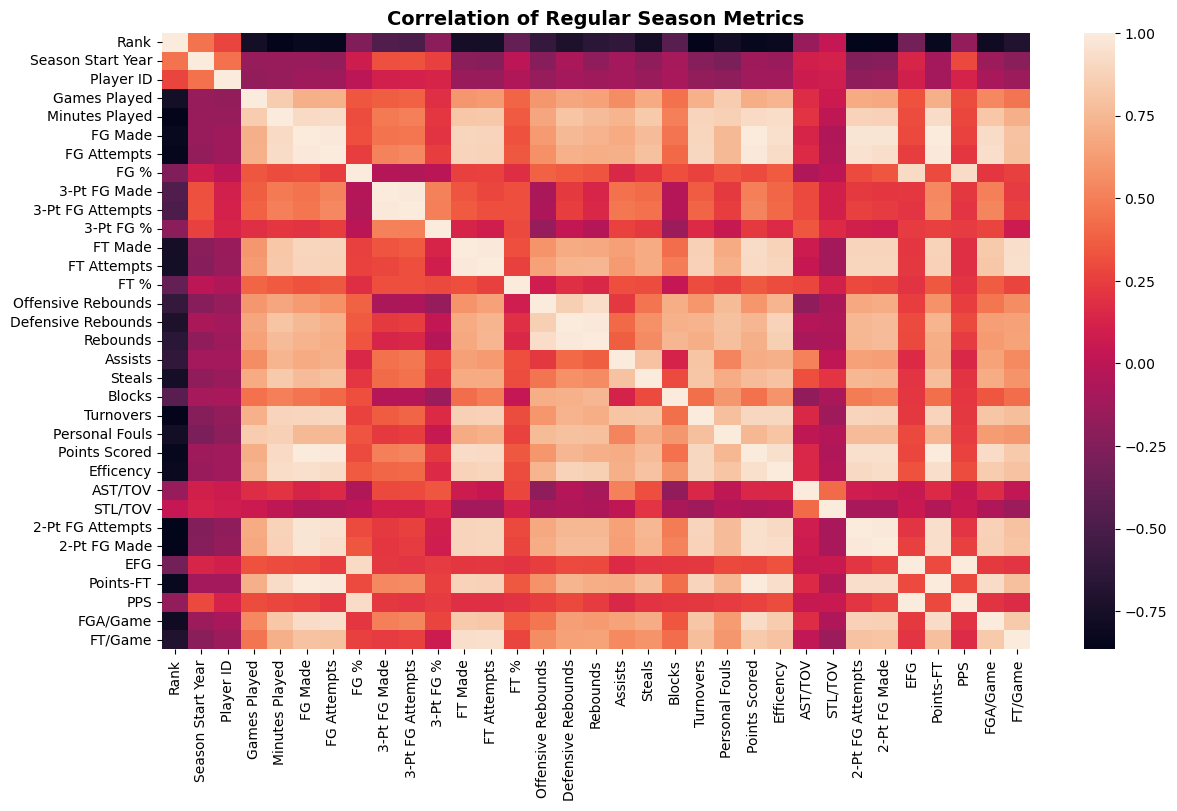

In [14]:
fig,ax=plt.subplots(figsize=(14,8))

C = nbaRegular.corr()
#set figure size
ax.set_title("Correlation of Regular Season Metrics",fontsize=14,weight="bold")

#plot heatmap
ax = sns.heatmap(C)
plt.show

In [15]:
print("Regular season Point per shot description:",end="\n")
print(nbaRegular.loc[:,"PPS"].describe(),end="\n\n")
print("-----------------------------",end="\n\n")
print("Raw Correlation Value of all columns with Points per Shot:")
print(C["PPS"])
print("Notably")

Regular season Point per shot description:
count    22762.000000
mean         0.930442
std          0.192447
min          0.000000
25%          0.857143
50%          0.948549
75%          1.026461
max          3.000000
Name: PPS, dtype: float64

-----------------------------

Raw Correlation Value of all columns with Points per Shot:
Rank                 -0.176145
Season Start Year     0.287939
Player ID             0.124594
Games Played          0.305095
Minutes Played        0.282550
FG Made               0.271479
FG Attempts           0.220333
FG %                  0.919974
3-Pt FG Made          0.226900
3-Pt FG Attempts      0.208573
3-Pt FG %             0.239748
FT Made               0.184443
FT Attempts           0.189847
FT %                  0.204176
Offensive Rebounds    0.243477
Defensive Rebounds    0.292169
Rebounds              0.236911
Assists               0.154265
Steals                0.204070
Blocks                0.213896
Turnovers             0.221541
Personal Foul

In [16]:
print("Regular season Free Throw Attempts description:",end="\n")
print(nbaRegular.loc[:,"FT Attempts"].describe(),end="\n\n")
print("-----------------------------",end="\n\n")

print("Raw Correlation Value of all columns with FT Attempts:")
C["FT Attempts"]

Regular season Free Throw Attempts description:
count    22832.000000
mean       146.278556
std        149.339566
min          0.000000
25%         33.000000
50%        100.000000
75%        214.000000
max       1363.000000
Name: FT Attempts, dtype: float64

-----------------------------

Raw Correlation Value of all columns with FT Attempts:


Rank                 -0.762811
Season Start Year    -0.236328
Player ID            -0.153925
Games Played          0.618615
Minutes Played        0.827292
FG Made               0.889492
FG Attempts           0.880318
FG %                  0.270263
3-Pt FG Made          0.284862
3-Pt FG Attempts      0.308299
3-Pt FG %             0.091379
FT Made               0.987611
FT Attempts           1.000000
FT %                  0.260989
Offensive Rebounds    0.650223
Defensive Rebounds    0.736465
Rebounds              0.739797
Assists               0.617404
Steals                0.690496
Blocks                0.490520
Turnovers             0.872098
Personal Fouls        0.720866
Points Scored         0.917888
Efficency             0.894173
AST/TOV               0.040541
STL/TOV              -0.111535
2-Pt FG Attempts      0.892343
2-Pt FG Made          0.897446
EFG                   0.226187
Points-FT             0.872336
PPS                   0.189847
FGA/Game              0.824714
FT/Game 

In [17]:
print("Regular season Field Goal Attempts description:",end="\n")
print(nbaRegular.loc[:,"FG Attempts"].describe(),end="\n\n")
print("-----------------------------",end="\n\n")
print("Raw Correlation Value of all columns with FG Attempts:")

C["FG Attempts"]

Regular season Field Goal Attempts description:
count    22832.000000
mean       471.100648
std        404.834809
min          0.000000
25%        129.000000
50%        378.000000
75%        719.000000
max       3159.000000
Name: FG Attempts, dtype: float64

-----------------------------

Raw Correlation Value of all columns with FG Attempts:


Rank                 -0.842461
Season Start Year    -0.179018
Player ID            -0.127956
Games Played          0.718716
Minutes Played        0.924732
FG Made               0.988437
FG Attempts           1.000000
FG %                  0.247735
3-Pt FG Made          0.514660
3-Pt FG Attempts      0.537959
3-Pt FG %             0.244952
FT Made               0.887240
FT Attempts           0.880318
FT %                  0.346973
Offensive Rebounds    0.570906
Defensive Rebounds    0.722805
Rebounds              0.702319
Assists               0.709160
Steals                0.790397
Blocks                0.415209
Turnovers             0.899021
Personal Fouls        0.756742
Points Scored         0.986839
Efficency             0.923018
AST/TOV               0.161345
STL/TOV              -0.045906
2-Pt FG Attempts      0.952520
2-Pt FG Made          0.940227
EFG                   0.248235
Points-FT             0.988568
PPS                   0.220333
FGA/Game              0.937305
FT/Game 

### Initial EDA on Playoff Data, Exploring Correlations with our Features

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/982170640.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C2 = nbaPlayoff.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

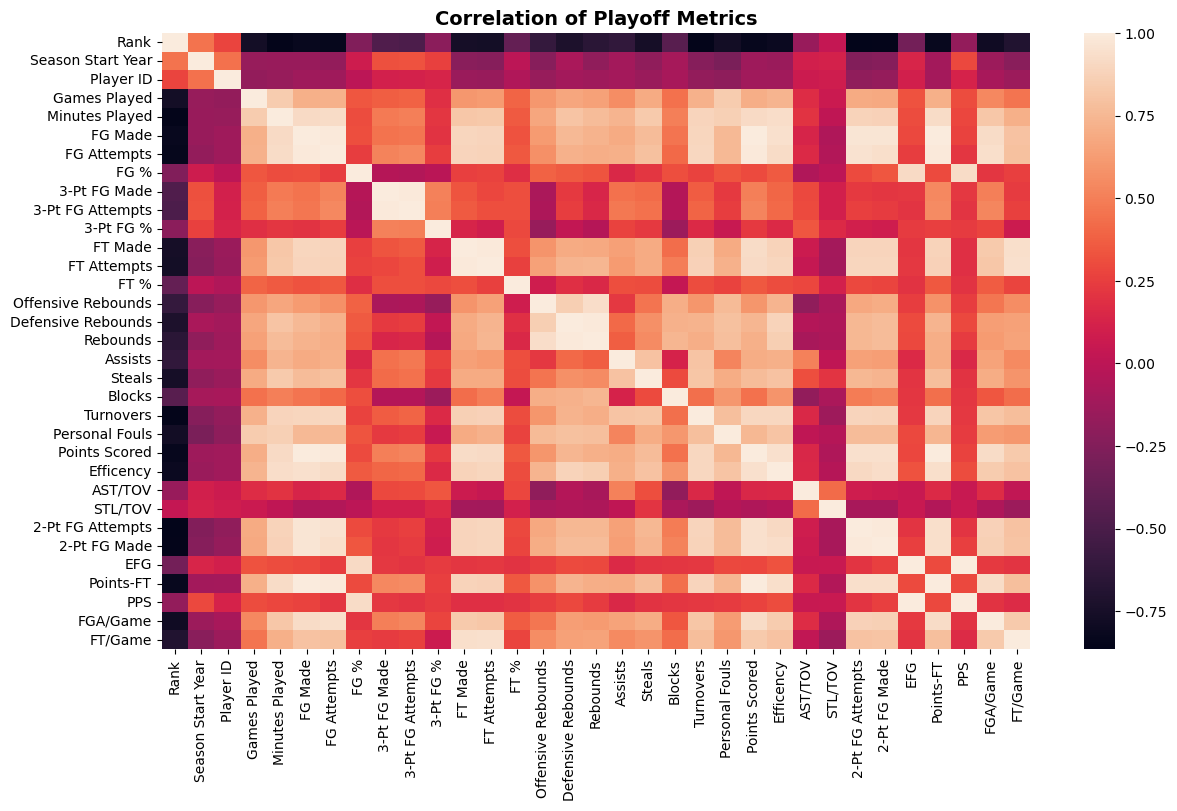

In [18]:
fig,ax=plt.subplots(figsize=(14,8))

C2 = nbaPlayoff.corr()
#set figure size

#plot heatmap
ax.set_title("Correlation of Playoff Metrics",fontsize=14,weight="bold"
             )
ax = sns.heatmap(C)
plt.show

In [19]:
print("Playoff Point per shot description:",end="\n")
print(nbaPlayoff.loc[:,"PPS"].describe(),end="\n\n")
print("-----------------------------",end="\n\n")
print("Raw Correlation Value of all columns with Points per Shot:")
C2["PPS"]

Playoff Point per shot description:
count    10236.000000
mean         0.907790
std          0.334277
min          0.000000
25%          0.779551
50%          0.930624
75%          1.054832
max          3.000000
Name: PPS, dtype: float64

-----------------------------

Raw Correlation Value of all columns with Points per Shot:


Rank                 -0.180626
Season Start Year     0.157552
Player ID             0.062428
Games Played          0.146625
Minutes Played        0.164344
FG Made               0.178261
FG Attempts           0.125628
FG %                  0.958420
3-Pt FG Made          0.156304
3-Pt FG Attempts      0.116232
3-Pt FG %             0.328564
FT Made               0.109650
FT Attempts           0.115182
FT %                  0.106800
Offensive Rebounds    0.132604
Defensive Rebounds    0.154129
Rebounds              0.138700
Assists               0.096722
Steals                0.119589
Blocks                0.127213
Turnovers             0.118585
Personal Fouls        0.152307
Points Scored         0.172937
Efficency             0.198394
AST/TOV               0.059793
STL/TOV               0.078237
2-Pt FG Attempts      0.111749
2-Pt FG Made          0.155023
EFG                   1.000000
Points-FT             0.187021
PPS                   1.000000
FGA/Game              0.104836
FT/Game 

In [20]:
print("Playoff Free Throw Attempts description:",end="\n")
print(nbaPlayoff.loc[:,"FT Attempts"].describe(),end="\n\n")
print("-----------------------------",end="\n\n")
print("Raw Correlation Value of all columns with FT Attempts:")
C2["FT Attempts"]

Playoff Free Throw Attempts description:
count    10498.000000
mean        22.278148
std         30.160012
min          0.000000
25%          3.000000
50%         11.000000
75%         29.000000
max        296.000000
Name: FT Attempts, dtype: float64

-----------------------------

Raw Correlation Value of all columns with FT Attempts:


Rank                 -0.672796
Season Start Year    -0.093999
Player ID            -0.088599
Games Played          0.608991
Minutes Played        0.833914
FG Made               0.892598
FG Attempts           0.885890
FG %                  0.180703
3-Pt FG Made          0.401505
3-Pt FG Attempts      0.432683
3-Pt FG %             0.108089
FT Made               0.982649
FT Attempts           1.000000
FT %                  0.295460
Offensive Rebounds    0.674282
Defensive Rebounds    0.785596
Rebounds              0.768616
Assists               0.703696
Steals                0.726164
Blocks                0.596991
Turnovers             0.873054
Personal Fouls        0.720707
Points Scored         0.922052
Efficency             0.898263
AST/TOV               0.109355
STL/TOV               0.013514
2-Pt FG Attempts      0.898250
2-Pt FG Made          0.899877
EFG                   0.123187
Points-FT             0.878989
PPS                   0.115182
FGA/Game              0.633796
FT/Game 

In [21]:
print("Playoff Field Goal Attempts description:",end="\n")
print(nbaPlayoff.loc[:,"FG Attempts"].describe(),end="\n\n")
print("-----------------------------",end="\n\n")
print("Raw Correlation Value of all columns with FG Attempts:")

C2["FG Attempts"]

Playoff Field Goal Attempts description:
count    10498.000000
mean        67.394551
std         78.765796
min          0.000000
25%         13.000000
50%         41.000000
75%         91.000000
max        661.000000
Name: FG Attempts, dtype: float64

-----------------------------

Raw Correlation Value of all columns with FG Attempts:


Rank                 -0.737951
Season Start Year    -0.039891
Player ID            -0.058520
Games Played          0.700608
Minutes Played        0.923946
FG Made               0.987150
FG Attempts           1.000000
FG %                  0.172492
3-Pt FG Made          0.602425
3-Pt FG Attempts      0.636004
3-Pt FG %             0.214924
FT Made               0.891876
FT Attempts           0.885890
FT %                  0.339320
Offensive Rebounds    0.627848
Defensive Rebounds    0.793153
Rebounds              0.751151
Assists               0.779753
Steals                0.815725
Blocks                0.543969
Turnovers             0.904747
Personal Fouls        0.779971
Points Scored         0.985975
Efficency             0.929470
AST/TOV               0.192042
STL/TOV               0.066819
2-Pt FG Attempts      0.957583
2-Pt FG Made          0.944419
EFG                   0.130125
Points-FT             0.987163
PPS                   0.125628
FGA/Game              0.720805
FT/Game 

### Removing nan rows

In [22]:
rows_to_remove = np.where(nbaRegular["PPS"] == np.nan)
# Removing the specified rows from the DataFrame
nbaRegular = nbaRegular.drop(rows_to_remove[0])

rows_to_remove = np.where(nbaPlayoff["PPS"] == np.nan)
# Removing the specified rows from the DataFrame
nbaPlayoff = nbaPlayoff.drop(rows_to_remove[0])

## Why are we considering PPS a measure of efficiency?
To answer this, let's start with the definition of the given "efficiency" metric, from the kaggle dataframe... 

"Efficency: (Points Scored + Rebounds + Assists + Steals + Blocks - Missed FG - Missed FT - Turnovers) / Games Played"

Reason 1. The provided efficiency metric measures many different types of events, as rebounds, steals, blocks, turnovers, and games played are completely separate events in the sport.
Reason 2. In basketball, you win by scoring more points. Every other type of event (rebound, steal, block, etc.) is an event that ends up leading to a shot - FG or FT attempt - later.
Reason 3. The given formula is unneccesarily long and unintuitive!

So this leads us to, why use points per shot (PPS) as a measure of efficiency?
Well, going back to reason 2, if the purpose of the sport is to score more points than the opponent, we want to focus on events that involve scoring points - field goal and free throw attempts.

PPS = (Total Points Scored - Free Throw Made) / Field Goal Attempts

So why remove Free throws from our total points scored, if our goal is to measure events that invovle scoring points? 
This gets into the rules of the sport itself, but free throws are not taken during the regular game. Free Throws are a penalty shot, and the game and time stops when a free throw is taken. Thus, by removing free throws, we can focus on only the events that occur during the regular game/time.
Ultimately, by removing made free throws from the numerator of points per shot, we can end up with a metric that only measures events from when a player is shooting the ball during regular play, i.e. the game of basketball itself. 

In the end, points per shot is a simple formula essentially the expected value -in points- for a player every time they shoot the ball. It is normalized to one attempt, and thus regardless of whether a player takes 1000 or 100 attempts, the PPS formula will hold true. There is the case where if a player takes one 3-pointer and makes it, their PPS would be 3 (very high), and this led us to define player outliers the way we did. (contribute at least )

Free throws we will measure as a completely separate metric. 

### Team Data: Team PPS Per Year (Regular Season)

In [23]:
#Regular Season: More cleaning of data for team pps per year
teamPPS_perYear = nbaRegular.groupby(['Year', 'Team'])["Points-FT","FG Attempts"] #Fix team PPS because this only take smedian of plauyer
teamPPS_perTeam = nbaRegular.groupby(['Team', 'Year'])["Points-FT","FG Attempts"]

uniqueYear = nbaRegular["Year"].unique()

nbaRegular["Player Median PPS this Year"] = np.nan
nbaRegular["This Teams PPS this Year"] = np.nan

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/4114202955.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamPPS_perYear = nbaRegular.groupby(['Year', 'Team'])["Points-FT","FG Attempts"] #Fix team PPS because this only take smedian of plauyer
/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/4114202955.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamPPS_perTeam = nbaRegular.groupby(['Team', 'Year'])["Points-FT","FG Attempts"]


In [24]:
#Regular Season: Gets team PPS and assigns to a new column

for i in teamPPS_perTeam.groups:
    thisGroup = teamPPS_perTeam.get_group(i)
    for j in nbaRegular.index:
        if nbaRegular.loc[j,"Year"] == i[1]:
                if nbaRegular.loc[j,"Team"] == i[0]: #0 0 = Team ; 0,1 = team
                    thisFGA_sum = np.sum(thisGroup["FG Attempts"])
                    thisPt_sum = np.sum(thisGroup["Points-FT"])
                    nbaRegular.loc[j,"This Teams PPS this Year"] = thisPt_sum / thisFGA_sum

### Team Data: Team PPS Per Year (Playoff)

In [25]:
#Playoff: More cleaning of data for team pps per year
teamPPS_perYear_playoff = nbaPlayoff.groupby(['Year', 'Team'])["Points-FT","FG Attempts"] #Add Points & FGA-FT to groupBy
teamPPS_perTeam_playoff = nbaPlayoff.groupby(['Team', 'Year'])["Points-FT","FG Attempts"]

uniqueYear_playoff = nbaPlayoff["Year"].unique()

nbaPlayoff["Player Median PPS this Year"] = np.nan
nbaPlayoff["This Teams PPS this Year"] = np.nan

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/3946248487.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamPPS_perYear_playoff = nbaPlayoff.groupby(['Year', 'Team'])["Points-FT","FG Attempts"] #Add Points & FGA-FT to groupBy
/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/3946248487.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamPPS_perTeam_playoff = nbaPlayoff.groupby(['Team', 'Year'])["Points-FT","FG Attempts"]


In [26]:
# Playoff: Gets team PPS and assigns to a new column

for i in teamPPS_perTeam_playoff.groups:
    thisGroup = teamPPS_perTeam_playoff.get_group(i)
    for j in nbaPlayoff.index:
        if nbaPlayoff.loc[j,"Year"] == i[1]:
                if nbaPlayoff.loc[j,"Team"] == i[0]: #0 0 = Team ; 0,1 = team
                    thisFGA_sum = np.sum(thisGroup["FG Attempts"])
                    thisPt_sum = np.sum(thisGroup["Points-FT"])
                    nbaPlayoff.loc[j,"This Teams PPS this Year"] = thisPt_sum / thisFGA_sum

## Defining Outlier Teams (75th percentile in TEAM PPS within their respective year) (Playoff + reg)

In [27]:
teamPPS_groupPlayoff = nbaPlayoff.groupby("Year")["This Teams PPS this Year"]
nbaPlayoff["This Year Median Team PPS"] = np.nan
for i in teamPPS_groupPlayoff.groups:
    thisGroup = teamPPS_groupPlayoff.get_group(i)
    for j in nbaPlayoff.index:
        if nbaPlayoff.loc[j,"Year"] == i:
            this75 = thisGroup.median()
            nbaPlayoff.loc[j,"This Year Median Team PPS"] = this75

In [28]:
teamPPS_groupReg = nbaRegular.groupby("Year")["This Teams PPS this Year"]
nbaRegular["This Year Median Team PPS"] = np.nan
for i in teamPPS_groupReg.groups:
    thisGroup = teamPPS_groupReg.get_group(i)
    for j in nbaRegular.index:
        if nbaRegular.loc[j,"Year"] == i:
            this75 = thisGroup.median()
            nbaRegular.loc[j,"This Year Median Team PPS"] = this75

### Shot Attempts percentile (Playoff+Reg)

In [29]:
#75% of shots per year
perYear_FGAplayoff = nbaPlayoff.groupby("Year")["FG Attempts","Games Played"] 

FGA75_perGame_playoff = {}
FGAmed_perGame_playoff = {}
for i in perYear_FGAplayoff.groups:
    FGA75_perGame_playoff[i] = (perYear_FGAplayoff.get_group(i)["FG Attempts"] / perYear_FGAplayoff.get_group(i)["Games Played"]).quantile([.75])

nbaPlayoff["This Year 75% FGA/Game"] = np.nan
for i in FGA75_perGame_playoff: #Loop thru years/keys
    for j in nbaPlayoff.index:
        if i == nbaPlayoff.loc[j,"Year"]:
            nbaPlayoff.loc[j,"This Year 75% FGA/Game"] = FGA75_perGame_playoff[i][.75]

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/1135302314.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  perYear_FGAplayoff = nbaPlayoff.groupby("Year")["FG Attempts","Games Played"]


In [30]:
#75% of shots per year
perYear_FGA = nbaRegular.groupby("Year")["FG Attempts","Games Played"] 
FGA75_perGame = {}
for i in perYear_FGA.groups:
    FGA75_perGame[i] = (perYear_FGA.get_group(i)["FG Attempts"] / perYear_FGA.get_group(i)["Games Played"]).quantile([.75])


nbaRegular["This Year 75% FGA/Game"] = np.nan
for i in FGA75_perGame: #Loop thru years/keys
    for j in nbaRegular.index:
        if i == nbaRegular.loc[j,"Year"]:
            nbaRegular.loc[j,"This Year 75% FGA/Game"] = FGA75_perGame[i][.75]

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/2651029955.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  perYear_FGA = nbaRegular.groupby("Year")["FG Attempts","Games Played"]


### Player PPS Quantiles (Playoff)

In [31]:
#Gets player median PPS and assigns to a new column

playerPPS_75quant_PerYear_playoff = {}
playerPPS_99quant_PerYear_playoff = {}
playerPPS_25quant_PerYear_playoff = {}

perYear_allPPS_playoff = nbaPlayoff.groupby("Year")["PPS"] #Using median to be robust to outlier
perYear_medPPS_playoff = nbaPlayoff.groupby("Year")["PPS"].median() #Using median to be robust to outlier

nbaPlayoff["League-Wide Player 75% PPS this Year"] = np.nan
nbaPlayoff["League-Wide Player 99% PPS this Year"] = np.nan
nbaPlayoff["League-Wide Player 25% PPS this Year"] = np.nan

for i in perYear_allPPS_playoff.groups:
    for j in nbaPlayoff.index:
        if nbaPlayoff.loc[j,"Year"] == i:
                nbaPlayoff.loc[j,"Player Median PPS this Year"] = perYear_medPPS_playoff[i]
                playerPPS_75quant_PerYear_playoff[i] = perYear_allPPS_playoff.get_group(i).quantile(.75)
                nbaPlayoff.loc[j,"League-Wide Player 75% PPS this Year"] = playerPPS_75quant_PerYear_playoff[i]
                playerPPS_99quant_PerYear_playoff[i] = perYear_allPPS_playoff.get_group(i).quantile(.99)
                nbaPlayoff.loc[j,"League-Wide Player 99% PPS this Year"] = playerPPS_99quant_PerYear_playoff[i]
                playerPPS_25quant_PerYear_playoff[i] = perYear_allPPS_playoff.get_group(i).quantile(.25)
                nbaPlayoff.loc[j,"League-Wide Player 25% PPS this Year"] = playerPPS_25quant_PerYear_playoff[i]

In [32]:
nbaPlayoff["Player PPS % above Median"] = 100*((nbaPlayoff["PPS"]-nbaPlayoff["Player Median PPS this Year"]) / nbaPlayoff["Player Median PPS this Year"])
nbaRegular["Player PPS % above Median"] = 100*((nbaRegular["PPS"]-nbaRegular["Player Median PPS this Year"]) / nbaRegular["Player Median PPS this Year"])

In [33]:
perYear_allPoints_playoff = nbaPlayoff.groupby("Year")["Player PPS % above Median"] #Using median to be robust to outlier
nbaPlayoff["Player 90% PPS This Year"] = np.nan

for i in perYear_allPoints_playoff.groups:
    thisYr_points = perYear_allPoints_playoff.get_group(i)
    thisQuant = thisYr_points.quantile([.90])
    for j in nbaPlayoff.index:
            if nbaPlayoff.loc[j,"Year"] == i:
                nbaPlayoff.loc[j,"Player 90% PPS This Year"] = thisQuant[.90]

### Points and PPS Quantile (Regular)

In [34]:
#Gets player median PPS of quantiled players and assigns to a new column
playerPPS_75quant_PerYear = {}
playerPPS_99quant_PerYear = {}
playerPPS_25quant_PerYear = {}

perYear_allPPS = nbaRegular.groupby("Year")["PPS"] #Using median to be robust to outlier
perYear_medPPS = nbaRegular.groupby("Year")["PPS"].median() #Using median to be robust to outlier

nbaRegular["League-Wide Player 75% PPS this Year"] = np.nan
nbaRegular["League-Wide Player 99% PPS this Year"] = np.nan
nbaRegular["League-Wide Player 25% PPS this Year"] = np.nan

for i in perYear_allPPS.groups:
    for j in nbaRegular.index:
        if nbaRegular.loc[j,"Year"] == i:
                nbaRegular.loc[j,"Player Median PPS this Year"] = perYear_medPPS[i]
                playerPPS_75quant_PerYear[i] = perYear_allPPS.get_group(i).quantile(.75)
                nbaRegular.loc[j,"League-Wide Player 75% PPS this Year"] = playerPPS_75quant_PerYear[i]
                playerPPS_99quant_PerYear[i] = perYear_allPPS.get_group(i).quantile(.99)
                nbaRegular.loc[j,"League-Wide Player 99% PPS this Year"] = playerPPS_99quant_PerYear[i]
                playerPPS_25quant_PerYear[i] = perYear_allPPS.get_group(i).quantile(.25)
                nbaRegular.loc[j,"League-Wide Player 25% PPS this Year"] = playerPPS_25quant_PerYear[i]

In [35]:
nbaRegular["Player 90% PPS This Year"] = np.nan

perYear_allPPS = nbaRegular.groupby("Year")["Player PPS % above Median"] #Using median to be robust to outlier
for i in perYear_allPPS.groups:
    thisYr_PPS = perYear_allPPS.get_group(i)
    thisQuant = thisYr_PPS.quantile([.90])
    for j in nbaRegular.index:
            if nbaRegular.loc[j,"Year"] == i:
                nbaRegular.loc[j,"Player 90% PPS This Year"] = thisQuant[.90]

## EDA Plot for PPS Across Years

findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.


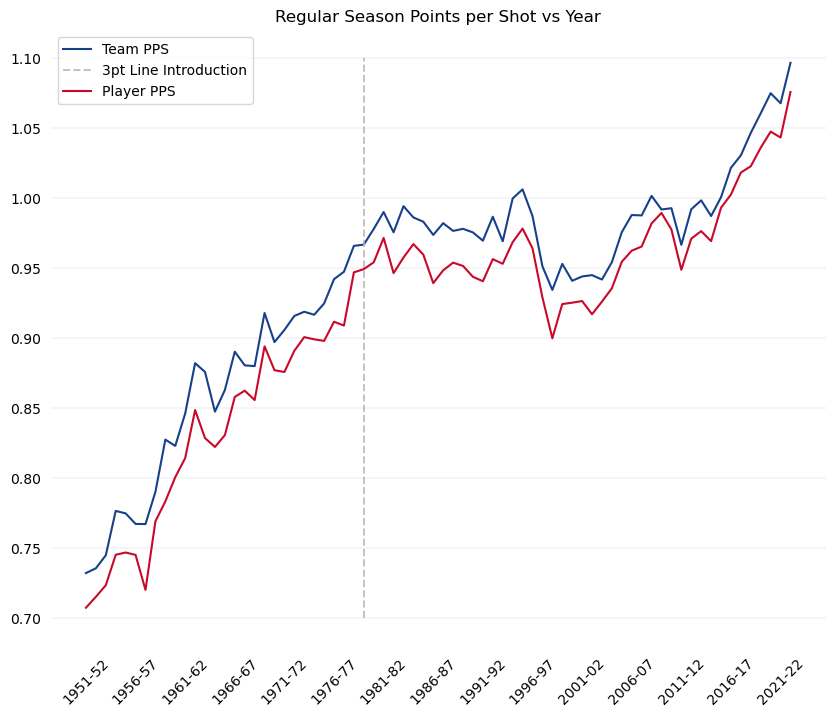

In [36]:
fig,ax = plt.subplots(figsize=(10,8),)

ax.plot(nbaRegular["Year"],nbaRegular["This Year Median Team PPS"],label="Team PPS",color="#17408B") #Need to fix the indices for now and make it look nice
title_font = {
    'fontsize': 12,        # Font size
    'fontfamily': 'Century Gothic', # Font family
}
ax.set_title("Regular Season Points per Shot vs Year",fontdict=title_font)
ax.vlines(x=28,ymin=.7,ymax=1.0999999999,color='#B8B2B2',alpha=.8,linewidth=1.4,linestyles='dashed',label="3pt Line Introduction")

label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)

ax.plot(nbaRegular["Year"],nbaRegular["Player Median PPS this Year"],color="#C9082A",label="Player PPS")


ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend()
plt.show()

#Zone defemce was imnammed

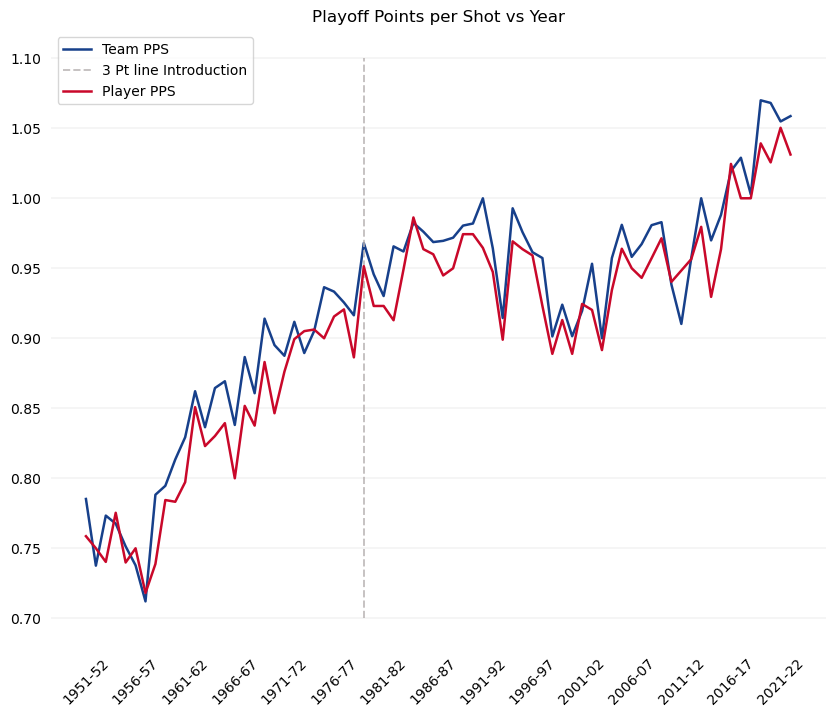

In [37]:
fig,ax = plt.subplots(figsize=(10,8),)

ax.plot(nbaPlayoff["Year"],nbaPlayoff["This Year Median Team PPS"],label="Team PPS",color="#17408B",linewidth=1.8) #Need to fix the indices for now and make it look nice
ax.set_title("Playoff Points per Shot vs Year")
ax.vlines(x=28,ymin=.7,ymax=1.0999999999,color='#B8B2B2',alpha=.8,linewidth=1.4,linestyles='dashed',label="3 Pt line Introduction")

ax.plot(nbaPlayoff["Year"],nbaPlayoff["Player Median PPS this Year"],color="#C9082A",label="Player PPS",linewidth=1.8,)

label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)


ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend()
plt.show()

Calculating Player % above median and Quantifying Outlier

In [38]:
nbaPlayoff["Player PPS % above Median"] = 100*((nbaPlayoff["PPS"]-nbaPlayoff["Player Median PPS this Year"]) / nbaPlayoff["Player Median PPS this Year"])
nbaRegular["Player PPS % above Median"] = 100*((nbaRegular["PPS"]-nbaRegular["Player Median PPS this Year"]) / nbaRegular["Player Median PPS this Year"])

In [39]:
teamPoints_perTeam = nbaRegular.groupby(['Team', 'Year'])["Points Scored"]
nbaRegular["This Team Total Pts"] = np.nan

for i in teamPoints_perTeam.groups:
    thisGroup = teamPoints_perTeam.get_group(i)
    for j in nbaRegular.index:
        if nbaRegular.loc[j,"Year"] == i[1]:
                if nbaRegular.loc[j,"Team"] == i[0]: #0 0 = Team ; 0,1 = team
                    nbaRegular.loc[j, "This Team Total Pts"] = np.sum(thisGroup)

In [40]:
nbaRegular["This Team PPG"] = nbaRegular["This Team Total Pts"] / 82
nbaRegular["This Player PPG"] = nbaRegular["Points Scored"] / nbaRegular["Games Played"]

In [41]:
teamPoints_perTeam = nbaPlayoff.groupby(['Team', 'Year'])["Points Scored"]
teamGames_perTeam = nbaPlayoff.groupby(['Team', 'Year'])["Games Played"]

nbaPlayoff["This Team Total Pts"] = np.nan
nbaPlayoff["This Team Games Played"] = np.nan

for i in teamPoints_perTeam.groups:
    thisGroup = teamPoints_perTeam.get_group(i)
    thisGroup_game = teamGames_perTeam.get_group(i)
    for j in nbaPlayoff.index:
        if nbaPlayoff.loc[j,"Year"] == i[1]:
                if nbaPlayoff.loc[j,"Team"] == i[0]: #0 0 = Team ; 0,1 = team
                    nbaPlayoff.loc[j, "This Team Total Pts"] = np.sum(thisGroup)
                    nbaPlayoff.loc[j, "This Team Games Played"] = thisGroup_game.max()

In [42]:
nbaPlayoff["This Team PPG"] = nbaPlayoff["This Team Total Pts"] / nbaPlayoff["This Team Games Played"]
nbaPlayoff["This Player PPG"] = nbaPlayoff["Points Scored"] / nbaPlayoff["Games Played"]

In [43]:
nbaRegular["Player % of Team Pts"] = 100 * (nbaRegular["This Player PPG"] / nbaRegular["This Team PPG"])
nbaPlayoff["Player % of Team Pts"] = 100 * (nbaPlayoff["This Player PPG"] / nbaPlayoff["This Team PPG"])

## Defining Outlier Players:

1. 90th percentile in "player % of team points" = 18%. This ensures that an outlier player significantly contributes to their team performance. 

2. 75th percentile in "FG attempts" within that respective year. This helps avoid the problem of: if a player takes only 1 FG attempt and makes a 3 pointer, their points per shot would be 3, when the median hovers around 1.

3. Player PPS is above median in regular season, and no less than 2% below the median in the playoffs. In the playoffs, competition gets stronger, where only 16/32 make the playoffs. Thus, when strong players play strong players, their strengths are neutralized, so we lower the PPS cutoff to account for that. Generally speaking now, we decide to keep the cutoff for PPS as at least median, because to us an outlier is a player who contributes significantly to their team (% of team points). For example, if an opponenet team knows one player is by far the best on our team, the opponent team will use a strategy to minimize the best players contribution, making the best player closer to the median. With our definition, we are aiming to take those "best players" from the example, that can still perform at median or above.

In [44]:
##Definition of an outlier Player

yoffOutlier = nbaPlayoff["Player % of Team Pts"].quantile(.9)
# nbaPlayoff["Outlier Player"] = (nbaPlayoff["Player % of Team Pts"] > yoffOutlier) & (nbaPlayoff["FGA/Game"] >= nbaPlayoff['This Year 75% FGA/Game'])
nbaPlayoff["Outlier Player"] = ((nbaPlayoff["Player % of Team Pts"] > yoffOutlier) & (nbaPlayoff["Player PPS % above Median"] >= -2) & ((nbaPlayoff["FGA/Game"] >= nbaPlayoff['This Year 75% FGA/Game']))) #-2
regOutlier = nbaRegular["Player % of Team Pts"].quantile(.9)
# nbaRegular["Outlier Player"] = (nbaRegular["Player % of Team Pts"] > regOutlier) & (nbaRegular["FGA/Game"] >= nbaRegular['This Year 75% FGA/Game'])
nbaRegular["Outlier Player"] = ((nbaRegular["Player % of Team Pts"] > regOutlier) & (nbaRegular["Player PPS % above Median"] >= 0) & ((nbaRegular["FGA/Game"] >= nbaRegular['This Year 75% FGA/Game']))) #-1

### Quantifying Team Outliers

In [45]:
weirdVal = np.where((nbaPlayoff["Outlier Player"] == True) & (nbaPlayoff["Player PPS % above Median"] <0) & (nbaPlayoff["Year"] =="1954-55"))
wVal = np.where((nbaRegular["Outlier Player"] == True) & (nbaRegular["Player PPS % above Median"] <0) & (nbaRegular["Year"] =="1954-55"))

In [46]:
nbaPlayoff["Team PPS % above Median"] = 100*((nbaPlayoff["This Teams PPS this Year"] - nbaPlayoff["This Year Median Team PPS"]) / nbaPlayoff["This Year Median Team PPS"])
nbaRegular["Team PPS % above Median"] = 100*((nbaRegular["This Teams PPS this Year"] - nbaRegular["This Year Median Team PPS"])/ nbaRegular["This Year Median Team PPS"])

In [47]:
# teamPPS_outlierPlayoff = nbaPlayoff.groupby(["Year"])["Team PPS % above Median"].quantile([.75])
teamPPS_outlierPlayoff = nbaPlayoff.groupby(["Year"])["Team PPS % above Median"]
# top10_yoff = teamPPS_outlierPlayoff.apply(lambda x: x.nlargest(10).iloc[-1])

nbaPlayoff["This Year 75% Team PPS Above Med"] = np.nan
nbaPlayoff["This Year Top 8 Team PPS Above Med"] = np.nan

for i in teamPPS_outlierPlayoff.groups:
    thisYear = np.sort((teamPPS_outlierPlayoff.get_group(i)).unique())
    if len(thisYear) ==1:
        top10 = thisYear[-1] #Could be 3
    elif len(thisYear) <= 10:
        top10 = thisYear[-2] #Could be 3
    else:
        top10 = thisYear[-4] #Could be 5
    for j in nbaPlayoff.index:
        if i == nbaPlayoff.loc[j,"Year"]:
            nbaPlayoff.loc[j,"This Year Top 8 Team PPS Above Med"] = top10


In [48]:
# teamPPS_outlierReg = nbaRegular.groupby(["Year"])["Team PPS % above Median"].quantile([.75])
teamPPS_outlierReg = nbaRegular.groupby(["Year"])["Team PPS % above Median"]
# top10 = teamPPS_outlierReg.apply(lambda x: x.nlargest(10).iloc[-1])

nbaRegular["This Year 75% Team PPS Above Med"] = np.nan
nbaRegular["This Year Top 8 Team PPS Above Med"] = np.nan
nbaPlayoff["Team Outlier in PPS"] = False

teamOut_counter ={}
for i in teamPPS_outlierReg.groups: #Year
    if i not in teamOut_counter:
        teamOut_counter[i] = 0
    thisYear = np.sort((teamPPS_outlierReg.get_group(i)).unique())
    if len(thisYear) <= 10:
        top10 = thisYear[-4] #could be 5
    else:
        top10 = thisYear[-8] #Could be 10
    for j in nbaRegular.index:
        if i == nbaRegular.loc[j,"Year"]:
            # nbaRegular.loc[j,"This Year 75% Team PPS Above Med"] = teamPPS_outlierReg[i[0]][.75]
            nbaRegular.loc[j,"This Year Top 8 Team PPS Above Med"] = top10
            if nbaRegular.loc[j,"Team PPS % above Median"] >= nbaRegular.loc[j,"This Year Top 8 Team PPS Above Med"]:
                nbaRegular.loc[j,"Team Outlier in PPS"] = True

For a Team outlier, we simply define them as a team who is top 8 in PPS, or top 4 if there are less teams that year. (8/32 = 1/4, thus 75th percentile.) 
In the playoff, outliers are top 4 or 2 respectively, keeping the percentile the same (4/16)

In [49]:
nbaPlayoff["Team Outlier in PPS"] = nbaPlayoff["Team PPS % above Median"] >= nbaPlayoff["This Year Top 8 Team PPS Above Med"]
nbaRegular["Team Outlier in PPS"] = nbaRegular["Team PPS % above Median"] >= nbaRegular["This Year Top 8 Team PPS Above Med"]


Creating New DF for players meeting minimum FGA

In [50]:
regPlayer_fgaInd = np.where((nbaRegular["Team Outlier in PPS"]==True))
playoffPlayer_fgaInd = np.where((nbaPlayoff["Team Outlier in PPS"]==True))

playoffFGA_playerDF = nbaPlayoff.iloc[playoffPlayer_fgaInd[0],:]
regularFGA_playerDF = nbaRegular.iloc[regPlayer_fgaInd[0],:]

In [51]:
#Taking new median PPS only from players

tInd = np.where((regularFGA_playerDF["Team Outlier in PPS"]==True)) #This is giving int index, not index in this column
pTrueInd = np.where((regularFGA_playerDF["Outlier Player"]==True))

Counting Outlier per Team (Regular)

In [52]:
regularFGA_playerDF = regularFGA_playerDF.reset_index()

In [53]:
count = 0
tCount = 0
yearDict = {}
for i in tInd[0]: #Loop thru outlier teams indices
    if regularFGA_playerDF.loc[i,"Year"] not in yearDict:
        yearDict[regularFGA_playerDF.loc[i,"Year"]] = {} #Create a nested dictionary for this year, where the nested keys are tje team
    if regularFGA_playerDF.loc[i,"Team"] not in yearDict[regularFGA_playerDF.loc[i,"Year"]]:
        yearDict[regularFGA_playerDF.loc[i,"Year"]][regularFGA_playerDF.loc[i,"Team"]] = 0
        tCount+=1
    if i in pTrueInd[0]: #If this outlier team entry is also an outlier player, add 1
        count+=1
        yearDict[regularFGA_playerDF.loc[i,"Year"]][regularFGA_playerDF.loc[i,"Team"]] += 1
    #Half the time, there is no outlier team
    
print(count)
print(tCount)


698
512


In [54]:
yearDict

{'1951-52': {'PHW': 1, 'BOS': 2, 'ROC': 3, 'NYK': 0},
 '1952-53': {'MNL': 2, 'BOS': 2, 'ROC': 2, 'NYK': 1},
 '1953-54': {'BOS': 3, 'MNL': 1, 'FTW': 1, 'NYK': 1},
 '1954-55': {'BOS': 3, 'FTW': 2, 'NYK': 2, 'ROC': 0},
 '1955-56': {'PHW': 2, 'MNL': 1, 'BOS': 2, 'NYK': 0},
 '1956-57': {'PHW': 2, 'STL': 2, 'BOS': 2, 'NYK': 0},
 '1957-58': {'SYR': 1, 'STL': 2, 'BOS': 2, 'NYK': 2},
 '1958-59': {'STL': 2, 'SYR': 1, 'NYK': 2, 'BOS': 2},
 '1959-60': {'STL': 3, 'SYR': 2, 'BOS': 1, 'NYK': 2},
 '1960-61': {'PHW': 2, 'CIN': 2, 'SYR': 0, 'DET': 2},
 '1961-62': {'PHW': 1, 'CIN': 2, 'STL': 2, 'LAL': 2},
 '1962-63': {'SFW': 1, 'CIN': 1, 'CHZ': 2, 'SYR': 0},
 '1963-64': {'CIN': 1, 'BLT': 2, 'LAL': 2, 'NYK': 1},
 '1964-65': {'LAL': 1, 'CIN': 2, 'BLT': 1, 'NYK': 1},
 '1965-66': {'PHL': 2, 'LAL': 1, 'CIN': 2, 'NYK': 1},
 '1966-67': {'CIN': 1, 'PHL': 1, 'BOS': 2, 'NYK': 1},
 '1967-68': {'DET': 3,
  'LAL': 3,
  'PHL': 2,
  'CIN': 2,
  'SEA': 1,
  'STL': 2,
  'BOS': 1,
  'NYK': 1},
 '1968-69': {'BLT': 2,
  'PH

Counting Outlier per Team (Playoffs)

In [55]:
yoffThresh = playoffFGA_playerDF["Player PPS % above Median"].quantile([.75])
yoffMedThresh = playoffFGA_playerDF["Player PPS % above Median"].median()

tpInd = np.where((playoffFGA_playerDF["Team Outlier in PPS"]==True)) #This is giving int index, not index in this column
yoffTrueInd = np.where((playoffFGA_playerDF["Outlier Player"]==True))
# yoffTrueInd = np.where((playoffFGA_playerDF["Outlier in PPS"]==True))
playoffFGA_playerDF = playoffFGA_playerDF.reset_index()

In [56]:
print(len(yoffTrueInd[0]))

262


In [57]:
ct = 0
ptCT = 0
yearDict_playoff = {}
for i in tpInd[0]: #Loop thru outlier teams indices
    if playoffFGA_playerDF.loc[i,"Year"] not in yearDict_playoff:
        yearDict_playoff[playoffFGA_playerDF.loc[i,"Year"]] = {} #Create a nested dictionary for this year, where the nested keys are tje team
    if playoffFGA_playerDF.loc[i,"Team"] not in yearDict_playoff[playoffFGA_playerDF.loc[i,"Year"]]:
        ptCT += 1
        yearDict_playoff[playoffFGA_playerDF.loc[i,"Year"]][playoffFGA_playerDF.loc[i,"Team"]] = 0
    if i in yoffTrueInd[0]: #If this outlier team entry is also an outlier player?
        ct+=1
        yearDict_playoff[playoffFGA_playerDF.loc[i,"Year"]][playoffFGA_playerDF.loc[i,"Team"]] += 1

print(ct)
print(ptCT)

262
238


In [58]:
yearDict_playoff

{'1951-52': {'MNL': 1, 'BOS': 2},
 '1952-53': {'NYK': 0, 'PHW': 0},
 '1953-54': {'MNL': 1, 'ROC': 0},
 '1954-55': {'BOS': 1, 'NYK': 0},
 '1955-56': {'PHW': 1, 'MNL': 0},
 '1956-57': {'MNL': 1, 'FTW': 1},
 '1957-58': {'STL': 2, 'DET': 1},
 '1958-59': {'DET': 2, 'STL': 2},
 '1959-60': {'STL': 2, 'PHW': 2},
 '1960-61': {'LAL': 1, 'BOS': 0},
 '1961-62': {'DET': 0, 'CIN': 1},
 '1962-63': {'LAL': 2, 'CIN': 1},
 '1963-64': {'STL': 0, 'LAL': 1},
 '1964-65': {'SFW': 1, 'BLT': 1},
 '1965-66': {'LAL': 2, 'BLT': 2},
 '1966-67': {'PHL': 1, 'CIN': 1},
 '1967-68': {'LAL': 2, 'NYK': 1},
 '1968-69': {'NYK': 2, 'SDR': 1},
 '1969-70': {'LAL': 2, 'MIL': 1},
 '1970-71': {'MIL': 1, 'PHL': 2},
 '1971-72': {'NYK': 1, 'BOS': 2},
 '1972-73': {'NYK': 1, 'BLT': 2},
 '1973-74': {'MIL': 2, 'DET': 1},
 '1974-75': {'HOU': 2, 'DET': 1},
 '1975-76': {'DET': 1, 'MIL': 1},
 '1976-77': {'PHL': 2, 'POR': 0, 'HOU': 0, 'WAS': 1},
 '1977-78': {'PHL': 0, 'MIL': 1, 'SAN': 1, 'NYK': 1},
 '1978-79': {'PHX': 2, 'PHL': 1, 'LAL': 1,

Adding team outlier count dictionary values to another dictionary lol

In [59]:
finalYoff_dict = {}

for year in yearDict_playoff:
    for team in yearDict_playoff[year]:
        if yearDict_playoff[year][team] not in finalYoff_dict: #If this player count not in output dict
            finalYoff_dict[yearDict_playoff[year][team]] = 1
        else:
            finalYoff_dict[yearDict_playoff[year][team]] += 1

In [60]:
print(ptCT)
finalYoff_dict

238


{1: 129, 2: 65, 0: 43, 3: 1}

In [61]:
finalReg_dict = {}
counter = 0
for year in yearDict:
    for team in yearDict[year]:
        if yearDict[year][team] not in finalReg_dict: #If this player count not in output dict
            finalReg_dict[yearDict[year][team]] = 1
        else:
            finalReg_dict[yearDict[year][team]] += 1
        counter += yearDict[year][team]

In [62]:
#com f Final
print(count)
print(tCount)
finalReg_dict

698
512


{1: 235, 2: 190, 3: 25, 0: 60, 4: 2}

In [64]:
regPCT_dict = {}
cumReg_dict = {}
sortKeys = list(finalReg_dict.keys())
sortKeys.sort()
print(sortKeys)
for i in sortKeys:
    regPCT_dict[i] = finalReg_dict[i] / 512
    if i==0:
        cumReg_dict[i] = regPCT_dict[i]
    else:
        cumReg_dict[i] = regPCT_dict[i] + cumReg_dict[i-1]
        
yoffPCT_dict = {}
cumYoff_dict = {}

sortKeys_yoff = list(finalYoff_dict.keys())
sortKeys_yoff.sort()
for i in sortKeys_yoff:
    yoffPCT_dict[i] = finalYoff_dict[i] / 238
    if i==0:
        cumYoff_dict[i] = yoffPCT_dict[i]
    else:
        cumYoff_dict[i] = yoffPCT_dict[i] + cumYoff_dict[i-1]



[0, 1, 2, 3, 4]


Raw PDF of % of teams with certain number of outliers

<BarContainer object of 5 artists>

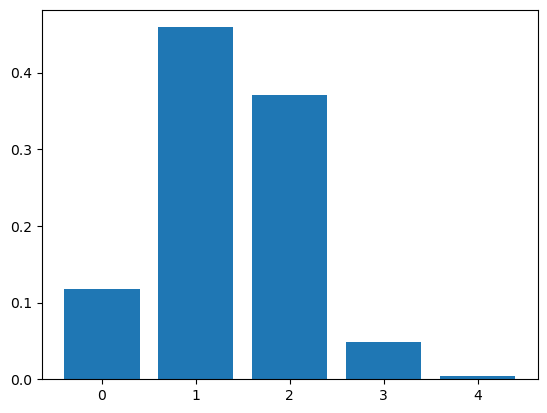

In [65]:
plt.bar(regPCT_dict.keys(),regPCT_dict.values()) #PDF

### Presentation CDF of Teams with certain # of Outlier (Regular Season)

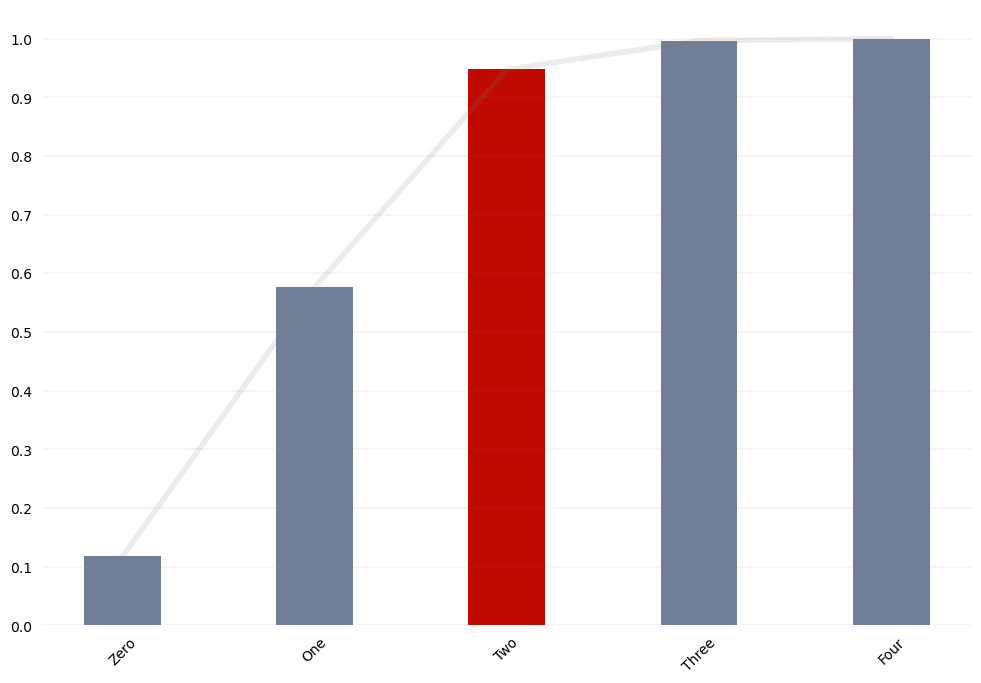

In [66]:
fig,ax=plt.subplots(figsize=(12,8))

colors = ["#717e97","#717e97","#c00900","#717e97","#717e97"]
alphas = [.65,.65,1,.65,.65]

bars = ax.bar(cumReg_dict.keys(),cumReg_dict.values(),color=colors,width=0.4,)

ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.set_yticks(np.arange(0,1.01,.1))
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(["Zero","One","Two","Three","Four","Five"],rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.plot(cumReg_dict.keys(),cumReg_dict.values(),color="grey",alpha=.15,linewidth=4)

plt.show()


In [67]:
# print(cumYoff_dict)
# cumYoff_dict.pop(4) #Drop value with 1 occurance for simplicity of CDF
# print(cumYoff_dict)

### Presentation CDF of Teams with certain # of Outlier (Playoff)

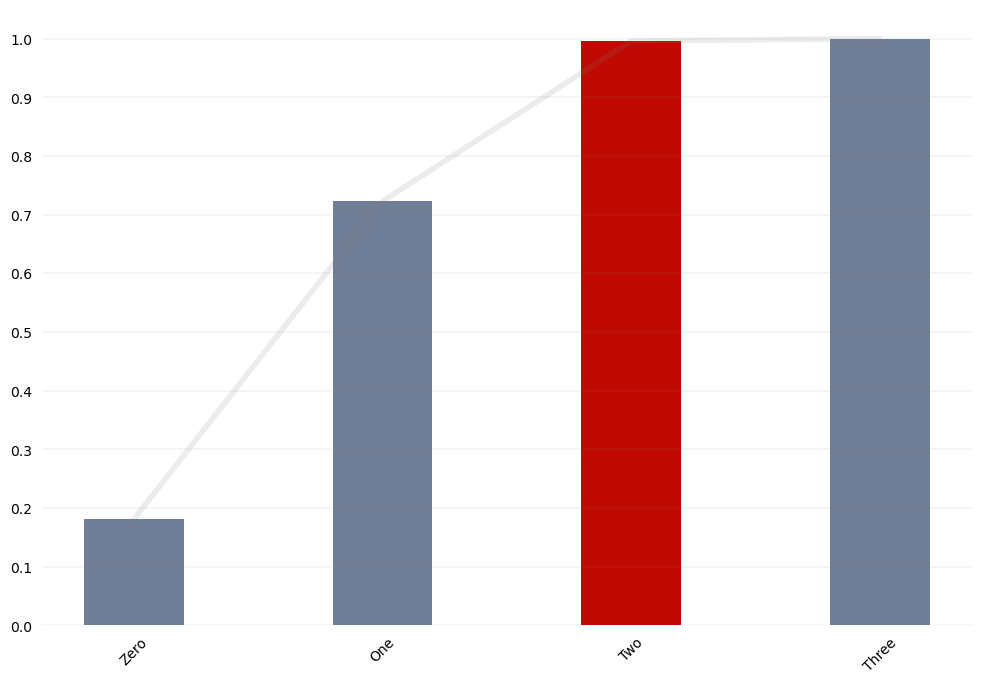

In [68]:
fig,ax=plt.subplots(figsize=(12,8))

colors = ["#717e97","#717e97","#c00900","#717e97","#717e97"]
alphas = [.65,.65,1,.65,.65]

bars = ax.bar(cumYoff_dict.keys(),cumYoff_dict.values(),color=colors,width=.4,)

ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.set_yticks(np.arange(0,1.01,.1))
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Zero","One","Two","Three"],rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# for bar, alpha in zip(bars, alphas):
#     bar.set_alpha(alpha)


plt.plot(cumYoff_dict.keys(),cumYoff_dict.values(),color="grey",alpha=.15,linewidth=4)

plt.show()

### Regular Season Free throw plot:

In [69]:
outlierDf_reg = nbaRegular.loc[nbaRegular["Outlier Player"]==True]
outlierDf_yoff = nbaPlayoff.loc[nbaPlayoff["Outlier Player"]==True]

In [70]:
ftYear_group_outlier = outlierDf_reg.groupby("Year")["FT/Game"].median()
ftYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FT/Game"].median()

ftYear_group = nbaRegular.groupby("Year")["FT/Game"].median()


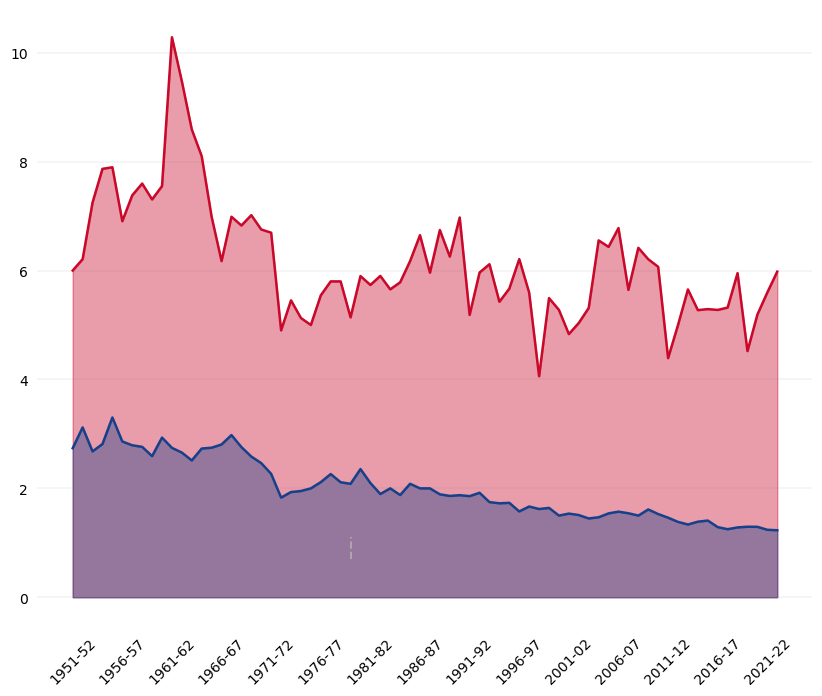

In [71]:
#Regular FT Plot
fig,ax = plt.subplots(figsize=(10,8),)

ax.vlines(x=28,ymin=.7,ymax=1.0999999999,color='#B8B2B2',alpha=.8,linewidth=1.4,linestyles='dashed',label="3 Pt line Introduction")
xx = range(0,72)

ax.plot(ftYear_group_outlier.index,ftYear_group_outlier.values,color="#C9082A",label="Outlier Median FT Attempts",linewidth=1.8,)
ax.fill_between(x=xx,y1=0,y2=ftYear_group_outlier.values,color="#C9082A",alpha=.4)

ax.plot(ftYear_group.index,ftYear_group.values,label="Median FT Attempts",color="#17408B",linewidth=1.8) #Need to fix the indices for now and make it look nice
ax.fill_between(x=xx,y1=0,y2=ftYear_group.values,color="#17408B",alpha=.4)


label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)

ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.legend()
plt.show()

### Regular Season Field Goal Plot

In [72]:
ftYear_group_outlier = outlierDf_reg.groupby("Year")["FGA/Game"].median()

ftYear_group = nbaRegular.groupby("Year")["FGA/Game"].median()

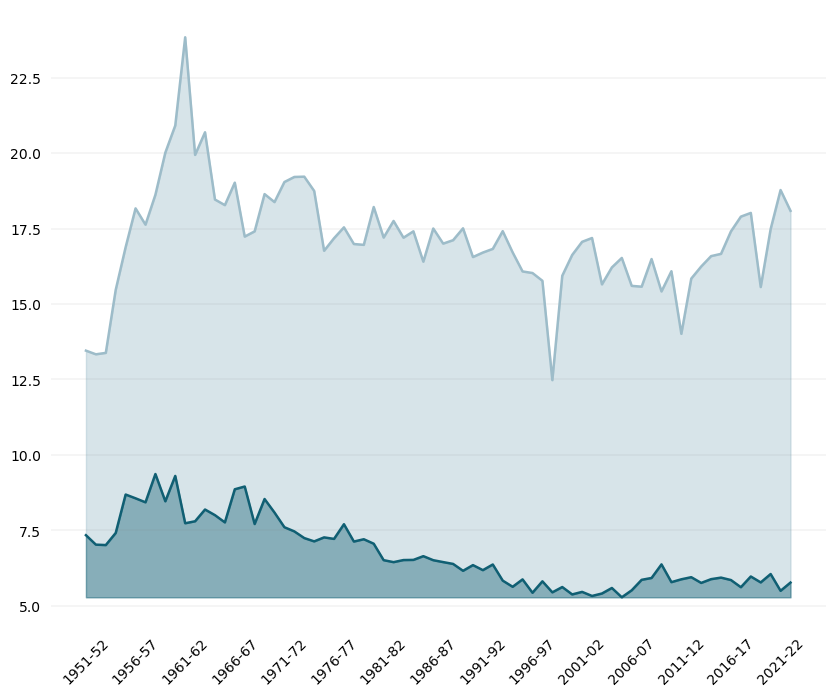

In [73]:
#Regular FG Plot
fig,ax = plt.subplots(figsize=(10,8),)

xx = range(0,72)
gg="#998179"
dark="#105F73"
light = "#9DBCC9"

ax.plot(ftYear_group_outlier.index,ftYear_group_outlier.values,color=light,label="Outlier Median FT Attempts",linewidth=1.8,)
ax.fill_between(x=xx,y1=ftYear_group.values.min(),y2=ftYear_group_outlier.values,color=light,alpha=.4)

ax.plot(ftYear_group.index,ftYear_group.values,label="Median FT Attempts",color=dark,linewidth=1.8) 
ax.fill_between(x=xx,y1=ftYear_group.values.min(),y2=ftYear_group.values,color=dark,alpha=.4)



label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)

ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.legend()
plt.show()

### Playoff Plot Free Throw

In [74]:
fgYear_groupPlayoff = nbaPlayoff.groupby("Year")["FT/Game"].median()
fgYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FT/Game"].median()

fgYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FT/Game"].median()
fgYear_groupPlayoff = nbaPlayoff.groupby("Year")["FT/Game"].median()

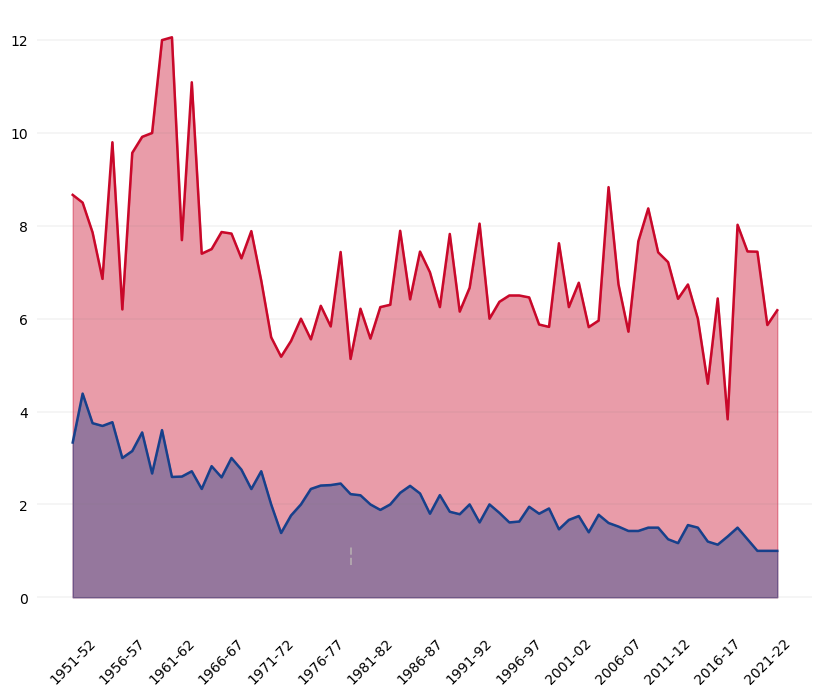

In [75]:
#Playoff FT Plot
fig,ax = plt.subplots(figsize=(10,8),)

ax.vlines(x=28,ymin=.7,ymax=1.0999999999,color='#B8B2B2',alpha=.8,linewidth=1.4,linestyles='dashed',label="3 Pt line Introduction")
xx = range(0,72)

ax.plot(fgYear_groupPlayoff_outlier.index,fgYear_groupPlayoff_outlier.values,color="#C9082A",label="Outlier Median FT Attempts",linewidth=1.8,)
ax.fill_between(x=xx,y1=0,y2=fgYear_groupPlayoff_outlier.values,color="#C9082A",alpha=.4)

ax.plot(fgYear_groupPlayoff.index,fgYear_groupPlayoff.values,label="Median FT Attempts",color="#17408B",linewidth=1.8) #Need to fix the indices for now and make it look nice
ax.fill_between(x=xx,y1=0,y2=fgYear_groupPlayoff.values,color="#17408B",alpha=.4)


label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)

ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.legend()
plt.show()

### Playoff FG Plot

In [76]:
fgYear_groupPlayoff = nbaPlayoff.groupby("Year")["FGA/Game"].median()
fgYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FGA/Game"].median()

fgYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FGA/Game"].median()
fgYear_groupPlayoff = nbaPlayoff.groupby("Year")["FGA/Game"].median()

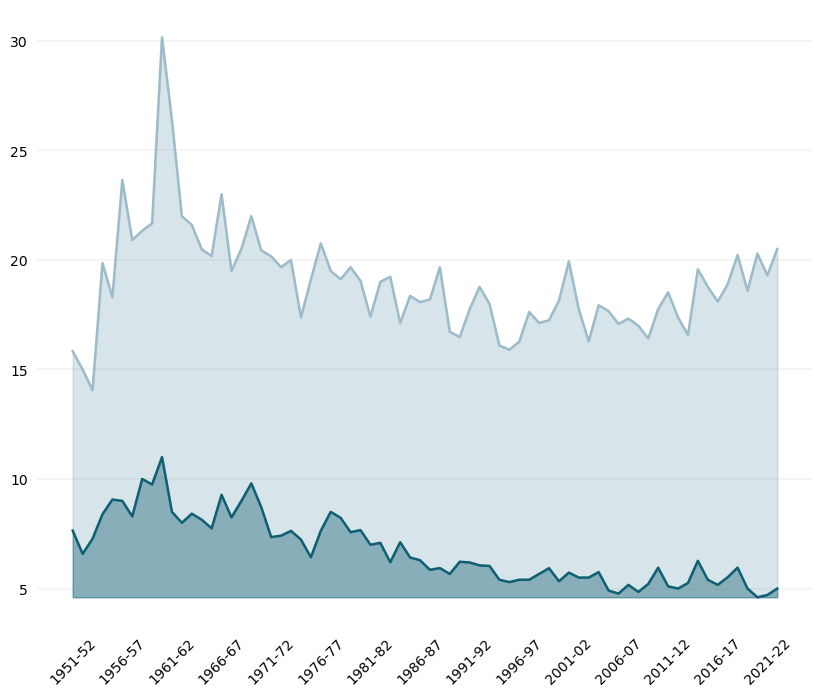

In [77]:
#Playoff FG Plot
fig,ax = plt.subplots(figsize=(10,8),)

xx = range(0,72)
gg="#998179"
dark="#105F73"
light = "#9DBCC9"

ax.plot(fgYear_groupPlayoff_outlier.index,fgYear_groupPlayoff_outlier.values,color=light,label="Outlier Median FT Attempts",linewidth=1.8,)
ax.fill_between(x=xx,y1=fgYear_groupPlayoff.values.min(),y2=fgYear_groupPlayoff_outlier.values,color=light,alpha=.4)

ax.plot(fgYear_groupPlayoff.index,fgYear_groupPlayoff.values,label="Median FT Attempts",color=dark,linewidth=1.8)
ax.fill_between(x=xx,y1=fgYear_groupPlayoff.values.min(),y2=fgYear_groupPlayoff.values,color=dark,alpha=.4)


label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)



ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.legend()
plt.show()

### Playoff FG Percentage Plot

In [78]:
fgpYear_groupPlayoff = nbaPlayoff.groupby("Year")["FG %"].median()
fgpYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FG %"].median()

fgpYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FG %"].median()
fgpYear_groupPlayoff = nbaPlayoff.groupby("Year")["FG %"].median()

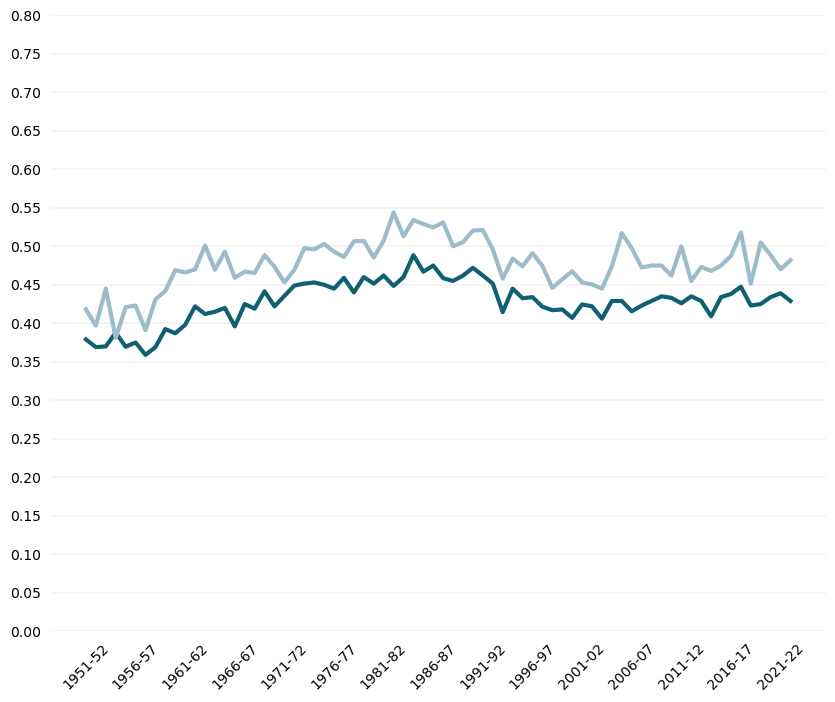

In [79]:
fig,ax = plt.subplots(figsize=(10,8),)


ax.plot(fgpYear_groupPlayoff.index,fgpYear_groupPlayoff.values,label="Regular FG %",color=dark,linewidth=3) #Need to fix the indices for now and make it look nice
# ax.set_title("Playoff FG%")

ax.plot(fgpYear_groupPlayoff_outlier.index,fgpYear_groupPlayoff_outlier.values,color=light,label="Outlier Player FG%",linewidth=3,)



label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)
ax.set_yticks(np.arange(0,.81,.05))

# ax.vlines(x=28,ymin=.7,ymax=1.0999999999,color='#B8B2B2',alpha=.8,linewidth=1.4,linestyles='dashed',label="3 Pt line Introduction")

ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.legend()
plt.show()

### Playoff Ft % plot

In [80]:
fgpYear_groupPlayoff = nbaPlayoff.groupby("Year")["FT %"].median()
fgpYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FT %"].median()

fgpYear_groupPlayoff_outlier = outlierDf_yoff.groupby("Year")["FT %"].median()
fgpYear_groupPlayoff = nbaPlayoff.groupby("Year")["FT %"].median()

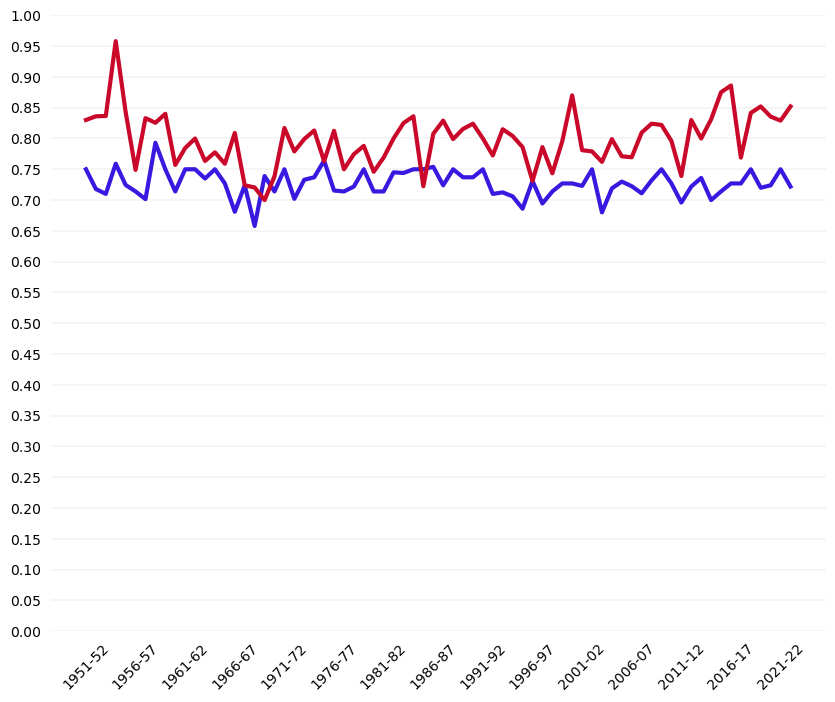

In [81]:
fig,ax = plt.subplots(figsize=(10,8),)

red = "#C9082A"
blue = "#3719E0"

ax.plot(fgpYear_groupPlayoff.index,fgpYear_groupPlayoff.values,label="Regular FT %",color=blue,linewidth=3) 
# ax.set_title("Playoff FT%")

ax.plot(fgpYear_groupPlayoff_outlier.index,fgpYear_groupPlayoff_outlier.values,color=red,label="Outlier Player FG%",linewidth=3,)


label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)
ax.set_yticks(np.arange(0,1.01,.05))


ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.legend()
plt.show()

Regular Season FG Percent Plot

In [82]:
fgpYear_group = nbaRegular.groupby("Year")["FG %"].median()
fgpYear_group_outlier = outlierDf_reg.groupby("Year")["FG %"].median()

fgpYear_group_outlier = outlierDf_reg.groupby("Year")["FG %"].median()
fgpYear_group = nbaRegular.groupby("Year")["FG %"].median()

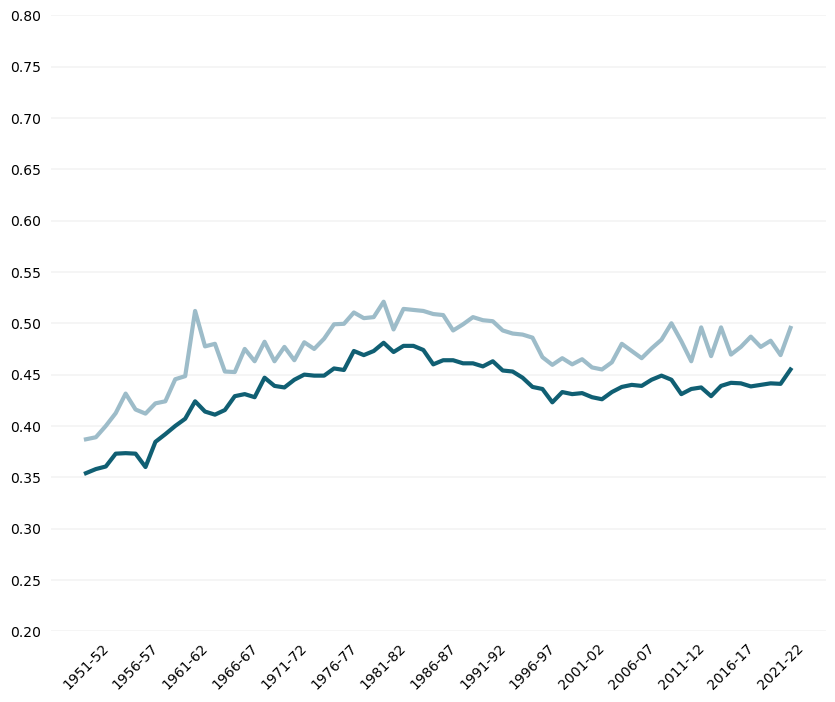

In [83]:
fig,ax = plt.subplots(figsize=(10,8),)

red = "#C9082A"
blue = "#3719E0"

ax.plot(fgpYear_group.index,fgpYear_group.values,label="Regular FT %",color=dark,linewidth=3)
# ax.set_title("Playoff FT%")

ax.plot(fgpYear_group_outlier.index,fgpYear_group_outlier.values,color=light,label="Outlier Player FG%",linewidth=3,)

label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)
ax.set_yticks(np.arange(0.2,.8,.05))

ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.legend()
plt.show()

### Regular Season FT %

In [84]:
fgpYear_group = nbaRegular.groupby("Year")["FT %"].median()
fgpYear_group_outlier = outlierDf_reg.groupby("Year")["FT %"].median()

fgpYear_group_outlier = outlierDf_reg.groupby("Year")["FT %"].median()
fgpYear_group = nbaRegular.groupby("Year")["FT %"].median()

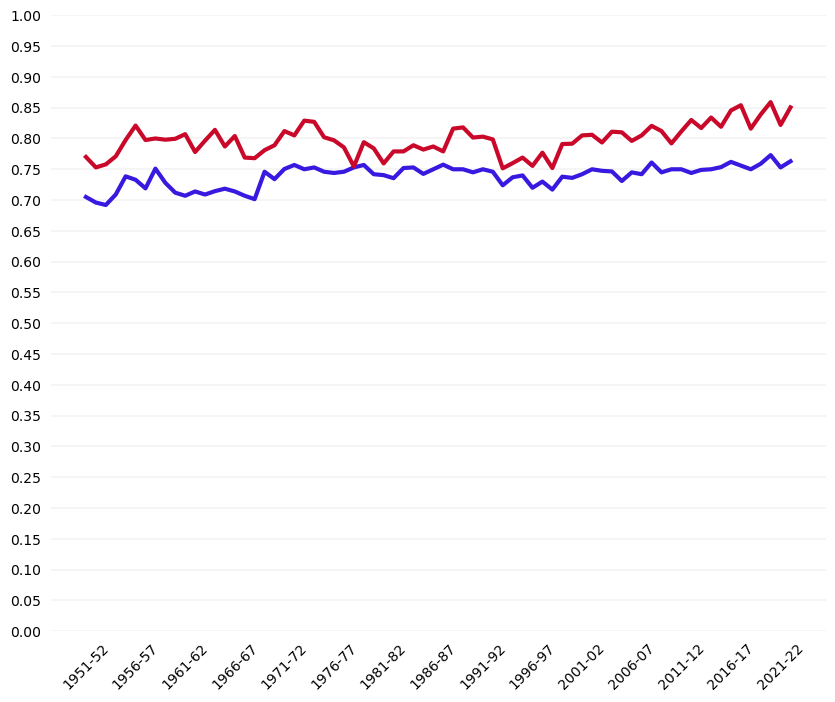

In [85]:
fig,ax = plt.subplots(figsize=(10,8),)

red = "#C9082A"
blue = "#3719E0"

ax.plot(fgpYear_group.index,fgpYear_group.values,label="Regular FT %",color=blue,linewidth=3)
# ax.set_title("Playoff FT%")

ax.plot(fgpYear_group_outlier.index,fgpYear_group_outlier.values,color=red,label="Outlier Player FG%",linewidth=3,)

label = uniqueYear_playoff[0::5]
ax.set_xticks(range(0,72,5))
ax.set_xticklabels(label,rotation=45)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)
ax.set_yticks(np.arange(0,1.01,.05))


ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=.35,alpha=.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.legend()
plt.show()

StripPlot (Unused in Presentation, more for EDA) that help visualize what our player outliers "look" like in terms of Points Per Game.

In [86]:
# corrDf = regularFGA_playerDF.loc[:,regularFGA_playerDF.drop(["index","Season Start Year","Season Type","Player ID","Games Played","Defensive Rebounds","Assists","Blocks","Personal Fouls","STL/TOV","This Year 75% FGA/Game","League-Wide Player 25% PPS this Year","Player 90% PPS This Year","Team PPS % above Median","This Year 75% Team PPS Above Med",'This Year Top 10 Team PPS Above Med'])]
t=regularFGA_playerDF.columns
corrDf = regularFGA_playerDF.drop(columns=[t[0],t[2],t[3]])

In [87]:
#StripPlot for PPG
outGroup = outlierDf_reg.groupby("Year")["This Player PPG"]
outMed = outlierDf_reg["This Player PPG"].median()


x_values = list(outGroup.groups.keys())

yv = {}
for yr in x_values:
    yv[yr] = outGroup.get_group(yr)

df = pd.DataFrame.from_dict(yv, orient='index').transpose()
melted_df = df.melt(var_name='Year', value_name="Points Per Game")

total = 0
for key in yv:
    thisG = yv[key]
    for val in thisG:
        total+=1

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/386037421.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=nba["Year"].unique(),rotation=90)
/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/386037421.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=melted_df, x='Year', y="Points Per Game", jitter=True,palette=cmapp)


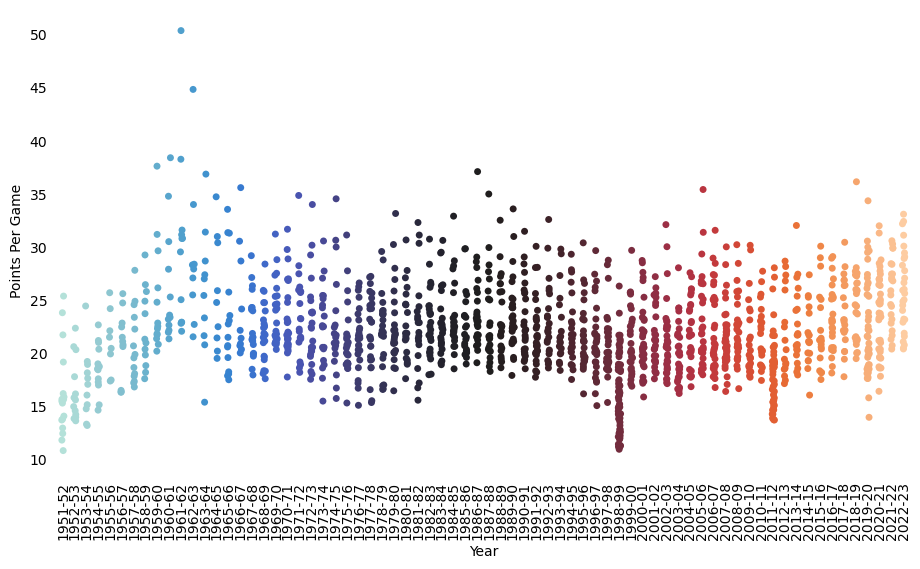

In [88]:
fig,ax = plt.subplots(figsize=(11,6))

xx = range(0,72)

# label = uniqueYear_playoff[0::5]
# ax.set_xticks(range(0,72,5))

cmap = sns.color_palette("icefire")
cmapp = "icefire"
ax.set_xticklabels(labels=nba["Year"].unique(),rotation=90)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)
sns.stripplot(data=melted_df, x='Year', y="Points Per Game", jitter=True,palette=cmapp)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

Presented StripPlot that Shows our Outliers are mostly 10% above the Median in PPS for their respective year

In [89]:
outGroup = outlierDf_reg.groupby("Year")["Player PPS % above Median"]
# print(outGroup.groups.keys())

# Create a list of x-axis values (years) from the dictionary keys
x_values = list(outGroup.groups.keys())

# Create a list of y-axis values (individual data points) from the dictionary values

yv = {}
for yr in x_values:
    yv[yr] = outGroup.get_group(yr)

df = pd.DataFrame.from_dict(yv, orient='index').transpose()
melted_df = df.melt(var_name='Year', value_name="% Difference from year's PPS Median")

zCount = 0
total = 0
for key in yv:
    thisG = yv[key]
    for val in thisG:
        total+=1
        if val <=0:
            zCount+=1

In [90]:
NonoutlierDf_reg = nbaRegular.loc[nbaRegular["Outlier Player"]==False]
NonoutlierDf_yoff = nbaPlayoff.loc[nbaPlayoff["Outlier Player"]==False]

rows_to_remove = np.where(NonoutlierDf_reg["Player PPS % above Median"] >=90)
# Removing the specified rows from the DataFrame
NonoutlierDf_reg = NonoutlierDf_reg.drop(NonoutlierDf_reg.index[rows_to_remove[0]])


#StripPlot for PPG
NonoutGroup = NonoutlierDf_reg.groupby("Year")["Player PPS % above Median"]
NonoutMed = NonoutlierDf_reg["This Player PPG"].median()


Nonx_values = list(outGroup.groups.keys())

Nonyv = {}
for yr in Nonx_values:
    Nonyv[yr] = NonoutGroup.get_group(yr)

Nondf = pd.DataFrame.from_dict(Nonyv, orient='index').transpose()
Nonmelted_df = Nondf.melt(var_name='Year', value_name="% Difference from year's PPS Median")

Nontotal = 0
for key in yv:
    NonthisG = yv[key]
    for val in thisG:
        Nontotal+=1

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/2535113706.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=nba["Year"].unique(),rotation=90)
/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/2535113706.py:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=melted_df, x='Year', y="% Difference from year's PPS Median", jitter=True,palette=cmapp,alpha=.7) #.5


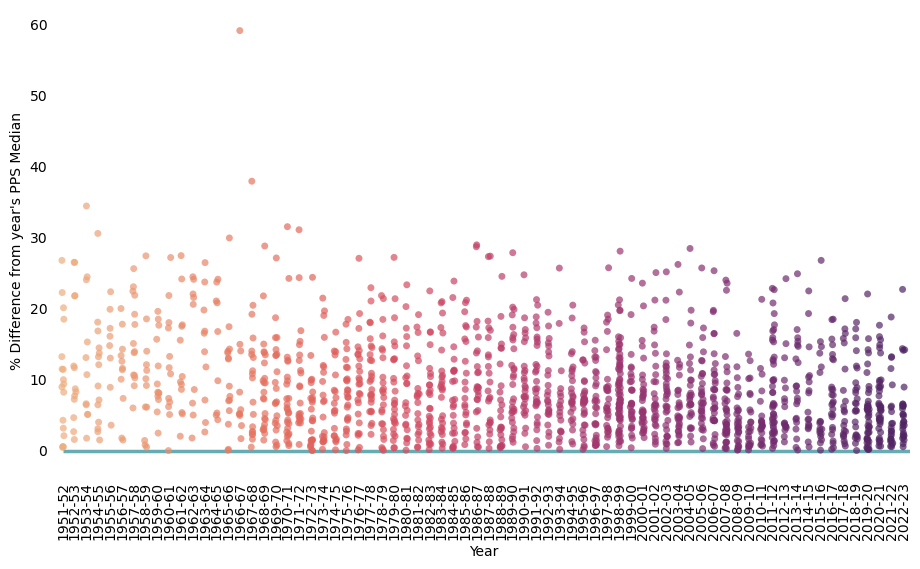

In [91]:
fig,ax = plt.subplots(figsize=(11,6))

xx = range(0,72)


#Textbook % of values below median

# label = uniqueYear_playoff[0::5]
# ax.set_xticks(range(0,72,5))
cmap = sns.color_palette("flare",) #Repeats colors versus not
cmapp = "flare"
ax.set_xticklabels(labels=nba["Year"].unique(),rotation=90)
ax.tick_params(axis='x',bottom=False)
ax.tick_params(axis='y',left=False)

ax.hlines(y=0,xmin=0,xmax=72,color='#017580',alpha=0.6,linewidth=2.5,label="Median")  #.7
# sns.stripplot(data=Nonmelted_df, x='Year', y="% Difference from year's PPS Median", jitter=True,color="#89a0b0",alpha=.3) #.5
sns.stripplot(data=melted_df, x='Year', y="% Difference from year's PPS Median", jitter=True,palette=cmapp,alpha=.7) #.5


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

More EDA on just outlier players

In [92]:
print("Regualar season outlier info:\n")
outlierDf_reg.info()


Regualar season outlier info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 32772
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rank                                  1678 non-null   int64  
 1   Year                                  1678 non-null   string 
 2   Season Start Year                     1678 non-null   int64  
 3   Season Type                           1678 non-null   object 
 4   Player ID                             1678 non-null   int64  
 5   Player                                1678 non-null   object 
 6   Team ID                               1678 non-null   string 
 7   Team                                  1678 non-null   object 
 8   Games Played                          1678 non-null   int64  
 9   Minutes Played                        1678 non-null   int64  
 10  FG Made                               1678 non-null 

In [93]:
print("Playoff outlier info:\n")
outlierDf_yoff.info()

Playoff outlier info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 115 to 33195
Data columns (total 57 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rank                                  768 non-null    int64  
 1   Year                                  768 non-null    string 
 2   Season Start Year                     768 non-null    int64  
 3   Season Type                           768 non-null    object 
 4   Player ID                             768 non-null    int64  
 5   Player                                768 non-null    object 
 6   Team ID                               768 non-null    string 
 7   Team                                  768 non-null    object 
 8   Games Played                          768 non-null    int64  
 9   Minutes Played                        768 non-null    int64  
 10  FG Made                               768 non-null    int64

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/2515712881.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ftCorr = outlierDf_reg.corr()


<Axes: title={'center': 'Correlation of for outlier players only, during the Regular Season'}>

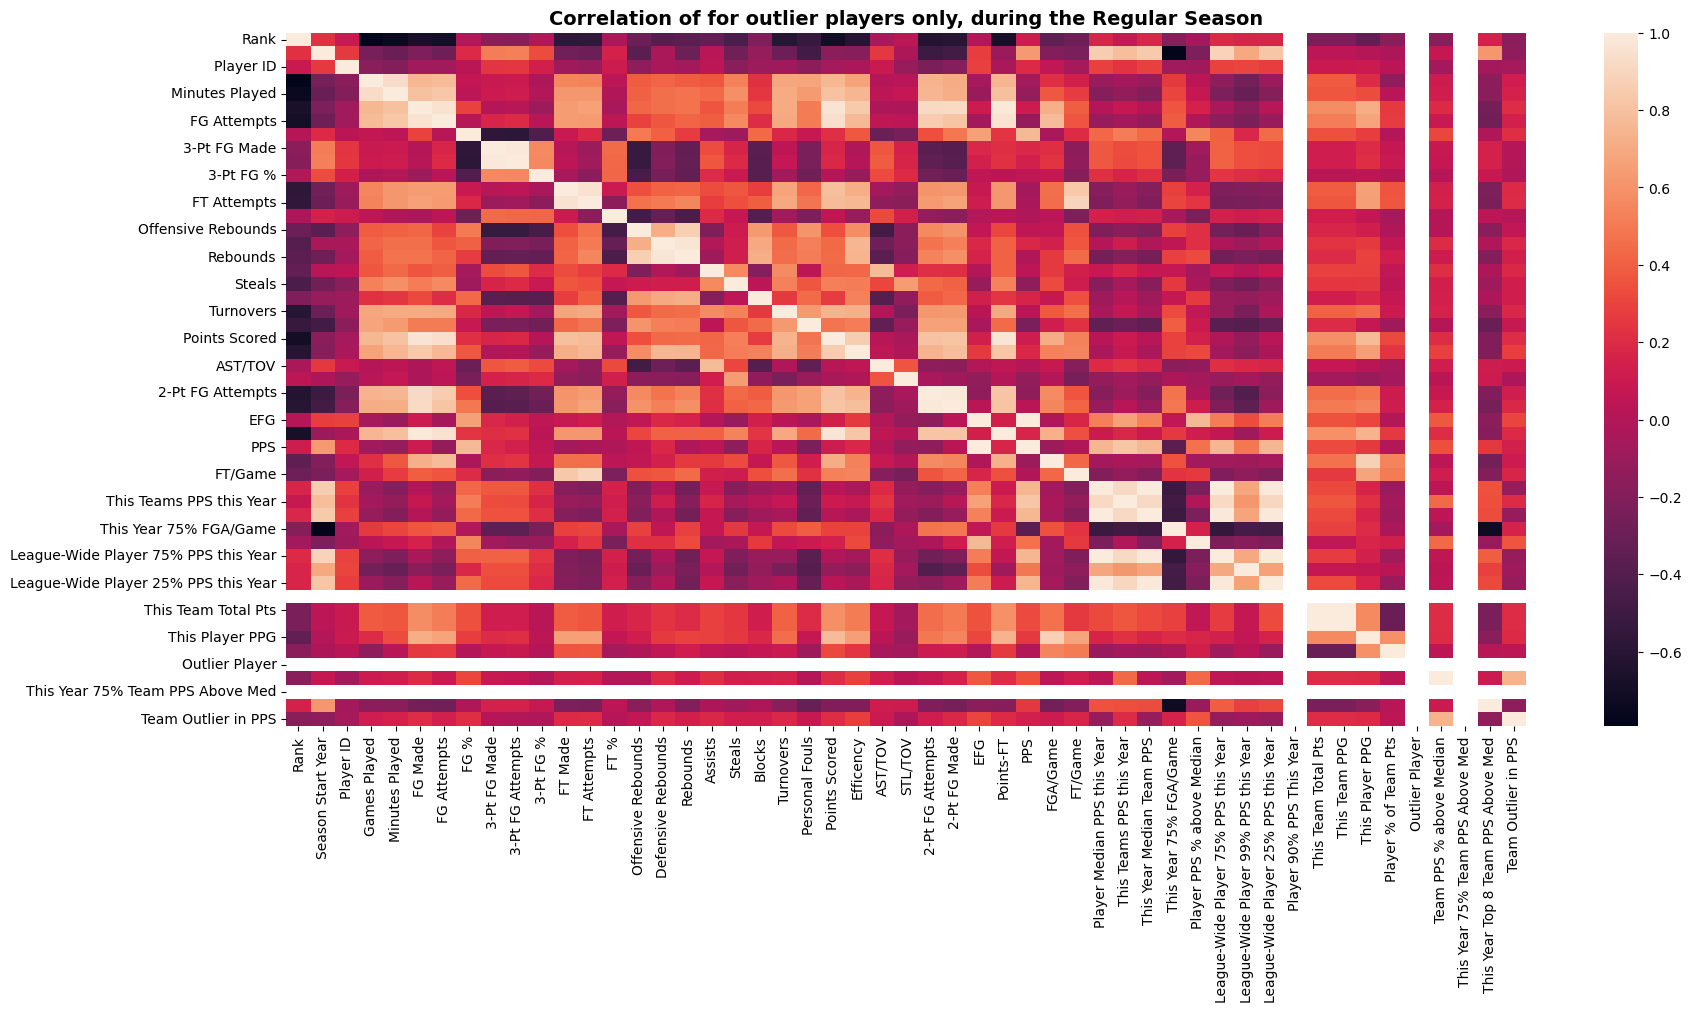

In [94]:
#FTA correlation with rank across all years
ftCorr = outlierDf_reg.corr()

#set figure size
fig, ax = plt.subplots(figsize=(20,9))
ax.set_title("Correlation of for outlier players only, during the Regular Season",fontsize=14,weight="bold")


#plot heatmap
sns.heatmap(ftCorr)

In [95]:
print("Regular season outlier player raw correlations with FT Attempts\n\n")


regFTCorr_outlier= outlierDf_reg.corr()["FT Attempts"]
regFTCorr_outlier

Regular season outlier player raw correlations with FT Attempts




/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/4079944738.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  regFTCorr_outlier= outlierDf_reg.corr()["FT Attempts"]


Rank                                   -0.554272
Season Start Year                      -0.300585
Player ID                              -0.111407
Games Played                            0.537492
Minutes Played                          0.620799
FG Made                                 0.657025
FG Attempts                             0.633270
FG %                                    0.186111
3-Pt FG Made                           -0.095767
3-Pt FG Attempts                       -0.073082
3-Pt FG %                              -0.157956
FT Made                                 0.956783
FT Attempts                             1.000000
FT %                                   -0.163022
Offensive Rebounds                      0.465215
Defensive Rebounds                      0.500703
Rebounds                                0.551276
Assists                                 0.272445
Steals                                  0.339285
Blocks                                  0.391414
Turnovers           

In [96]:
print("Regular season outlier player correlation with\nBoolean value, 'if the team is an outlier in pps'\n\n")

outlierDf_reg.corr()["Team Outlier in PPS"]


Regular season outlier player correlation with
Boolean value, 'if the team is an outlier in pps'




/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/367735303.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  outlierDf_reg.corr()["Team Outlier in PPS"]


Rank                                   -0.174010
Season Start Year                      -0.143716
Player ID                              -0.050354
Games Played                            0.122240
Minutes Played                          0.146237
FG Made                                 0.204091
FG Attempts                             0.143631
FG %                                    0.211501
3-Pt FG Made                            0.005551
3-Pt FG Attempts                       -0.002158
3-Pt FG %                              -0.011709
FT Made                                 0.192239
FT Attempts                             0.196347
FT %                                    0.004848
Offensive Rebounds                      0.059623
Defensive Rebounds                      0.180472
Rebounds                                0.137073
Assists                                 0.184765
Steals                                  0.130032
Blocks                                  0.130604
Turnovers           

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/3892240909.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ftCorr = outlierDf_yoff.corr()


<Axes: title={'center': 'Correlation of for outlier players only, during the playoff'}>

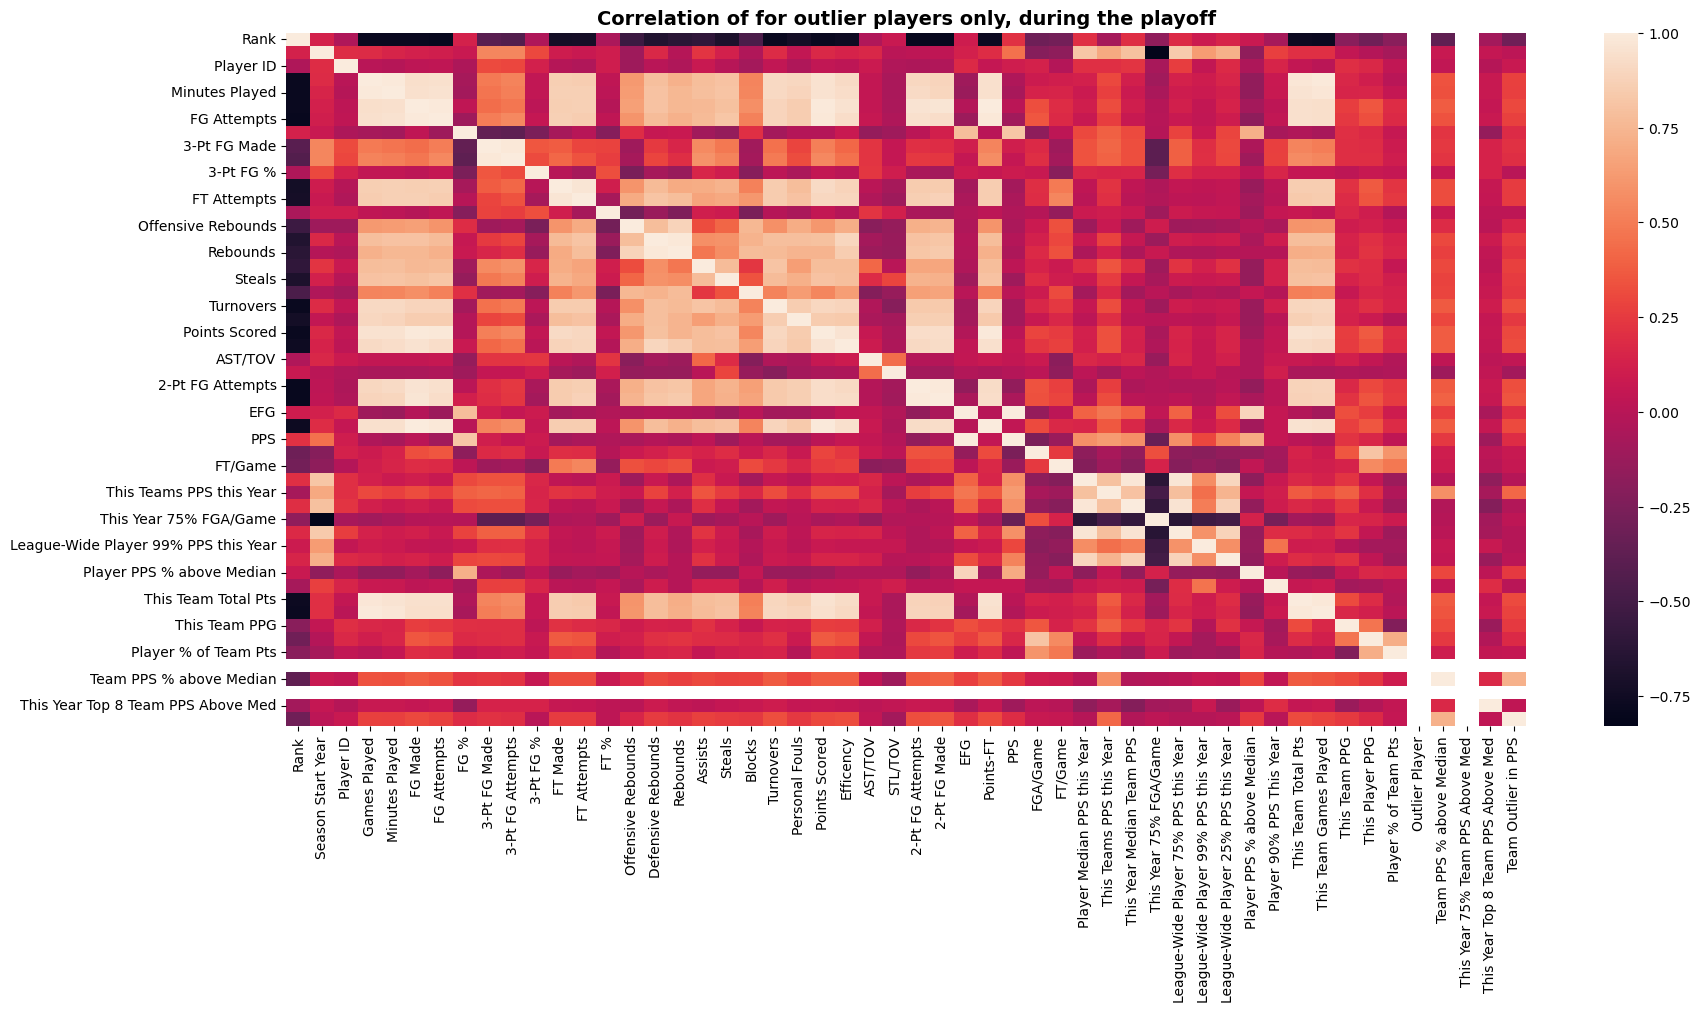

In [97]:
#FTA correlation with rank across all years

ftCorr = outlierDf_yoff.corr()

#set figure size
fig, ax = plt.subplots(figsize=(20,9))
ax.set_title("Correlation of for outlier players only, during the playoff",fontsize=14,weight="bold")

#plot heatmap
sns.heatmap(ftCorr)

In [98]:
print("Playoff outlier player raw correlations with FT Attempts\n\n")


yoffFTCorr_outlier= outlierDf_yoff.corr()["FT Attempts"]
yoffFTCorr_outlier

Playoff outlier player raw correlations with FT Attempts




/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/923074314.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  yoffFTCorr_outlier= outlierDf_yoff.corr()["FT Attempts"]


Rank                                   -0.722386
Season Start Year                       0.078643
Player ID                              -0.034079
Games Played                            0.853606
Minutes Played                          0.867048
FG Made                                 0.864724
FG Attempts                             0.854793
FG %                                   -0.006214
3-Pt FG Made                            0.291685
3-Pt FG Attempts                        0.338309
3-Pt FG %                              -0.072104
FT Made                                 0.967861
FT Attempts                             1.000000
FT %                                   -0.074369
Offensive Rebounds                      0.697222
Defensive Rebounds                      0.807503
Rebounds                                0.779535
Assists                                 0.666479
Steals                                  0.691126
Blocks                                  0.608129
Turnovers           

In [99]:
print("Playoff outlier player correlation with\nBoolean value, 'if the team is an outlier in pps'\n\n")

outlierDf_yoff.corr()["Team Outlier in PPS"]

Playoff outlier player correlation with
Boolean value, 'if the team is an outlier in pps'




/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/2528231864.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  outlierDf_yoff.corr()["Team Outlier in PPS"]


Rank                                   -0.304567
Season Start Year                       0.019084
Player ID                               0.078220
Games Played                            0.272769
Minutes Played                          0.266855
FG Made                                 0.304850
FG Attempts                             0.273035
FG %                                    0.181626
3-Pt FG Made                            0.214099
3-Pt FG Attempts                        0.199403
3-Pt FG %                               0.001262
FT Made                                 0.251160
FT Attempts                             0.254888
FT %                                    0.025447
Offensive Rebounds                      0.155785
Defensive Rebounds                      0.253467
Rebounds                                0.216729
Assists                                 0.277212
Steals                                  0.252659
Blocks                                  0.236117
Turnovers           

Plot on team wins that are top 10 in revenue

In [100]:
nykWin = (47)/(82)
lalWin = (43)/(82)
chiWin = (40)/(82)
gswWin = (44)/(82)
houWin = (20)/(82)
mkwWin = (58)/(82)
bknWin = .54 #found percentage data
dmvWin = .46
lacWin = .52
bosWin = .69

avgWinpct = (bosWin + lacWin + dmvWin + bknWin + mkwWin + houWin + gswWin + chiWin + lalWin + nykWin)/10

In [101]:

vals=[nykWin, lalWin, chiWin, gswWin, houWin, mkwWin,bknWin,dmvWin,lacWin,bosWin, 0.35, 0.38, 0.35, 0.51, 0.45,0.39,0.35,0.48,0.51,.42,0.41,0.37,0.34,0.43,0.39,0.24,0.41,0.31,0.53,0.57,0.43,0.42]
print(len(vals))


32


/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_63146/1460232979.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals, hist=True, kde=True,


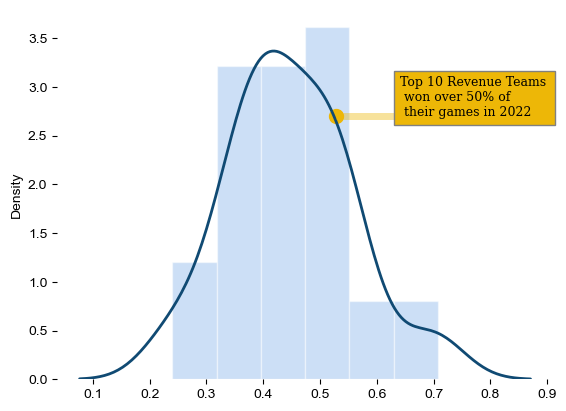

In [102]:
fig, ax = plt.subplots()
sns.set_style("white")
sns.color_palette("rocket", as_cmap=True)
sns.distplot(vals, hist=True, kde=True,
             hist_kws={"color": "#8EB9ED", "alpha": .45},  # Histogram color
             kde_kws={"color":"#104A73", "lw": 2})   
ax.scatter(avgWinpct,2.7,s=100,c="#EDB707")
ax.text(.64,2.7,"Top 10 Revenue Teams \n won over 50% of \n their games in 2022",fontsize=9,fontname='serif',color='black',bbox=dict(facecolor='#EDB707', edgecolor='grey'))
ax.hlines(y=2.7,xmin=avgWinpct,xmax=.64,color='#EDB707',linewidth=5,alpha=0.4, clip_on=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

External links used

In [103]:
nbaRevenuelink = "https://www.cnbc.com/2021/10/18/nba-2021-2022-season-10-billion-revenue-tv-viewership-rebound.html"
linkforWins2022 = "https://www.nba.com/standings"
"https://www.forbes.com/sites/mikeozanian/2022/10/27/nba-team-values-2022-for-the-first-time-in-two-decades-the-top-spot-goes-to-a-franchise-thats-not-the-knicks-or-lakers/?sh=1923f1911cce"

'https://www.forbes.com/sites/mikeozanian/2022/10/27/nba-team-values-2022-for-the-first-time-in-two-decades-the-top-spot-goes-to-a-franchise-thats-not-the-knicks-or-lakers/?sh=1923f1911cce'